# First Deep Learning Project in Python with Keras

The steps we are going to cover:
1. Load Data.
2. Define Keras Model.
3. Compile Keras Model.
4. Fit Keras Model.
5. Evaluate Keras Model.
6. Put It All Together.
7. Make Predictions

## Load Data
    

Download the dataset and place it in your local working directory, the same location as your python file. Take a look at the dataset:

In [1]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')

Here, you can explore the data a little. We have our input features in the first ten columns:

- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:
- Is the house price above the median or not? (1 for yes and 0 for no)

Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

In [2]:
dataset = df.values

Split the dataset into input features (X) and the feature we wish to predict (Y). To do that split, assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y

In [3]:
X = dataset[:,0:10]
Y = dataset[:,10]

The next step in our processing is to make sure that the scale of the input features are similar. Right now, features such as lot area are in the order of the thousands, a score for overall quality is ranged from 1 to 10, and the number of fireplaces tend to be 0, 1 or 2. You will use the 'preprocessing' package from within the sklearn package. Use a function called the min-max scaler (from sklearn import preprocessing.MinMaxScaler()), which scales the dataset so that all the input features lie between 0 and 1 inclusive and take a look at your data.

In [4]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_scaled = std.fit_transform(X)

In [5]:
df_X_scaled = pd.DataFrame(X_scaled, columns = list(df.columns[0:10]))

Now, we are down to our last step in processing the data, which is to split our dataset into a training set, a validation set and a test set.

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

In [6]:
X.shape

(1460, 10)

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test = train_test_split(X_scaled,Y, test_size = 0.3, random_state=41)

In [8]:
X_train.shape

(1022, 10)

Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [9]:
X_test, X_val, Y_test, Y_val  = train_test_split(X_test,Y_test,test_size = 0.5, random_state=41)

These are the dimensions you need to get for your train, validation and test datasets: 
(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)

## Define Keras Model.

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:
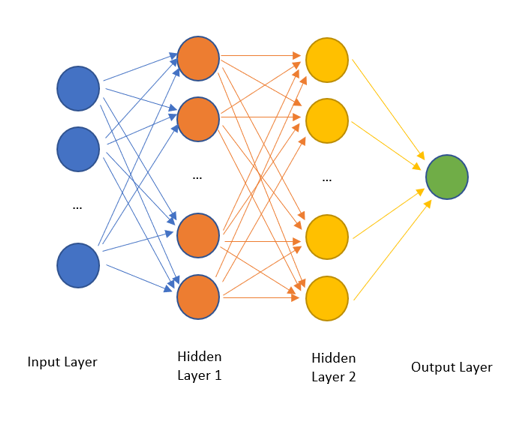
In words, we want to have these layers:

- Hidden layer 1: 12 neurons, ReLU activation
- Hidden layer 2: 16 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation
    
Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.

In [35]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation


def get_model(k1=12,k2=16, metrics=['accuracy']):

    model = Sequential([
                        Dense(k1,input_shape=(10,)),
                        Activation('relu'),
                        Dense(k2),
                        Activation('relu'),
                        Dense(1),
                        Activation('sigmoid')])

    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=metrics)
    return model

Now that the model is defined, we can compile it.

Compiling the model uses TensorFlow that chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data (use 100 iterations and 32 batch size).

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                132       
_________________________________________________________________
activation_1 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                208       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 357
Trainable params: 357
Non-trainable params: 0
________________________________________________________

In [24]:
history = model.fit(X_train,Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 283us/step - loss: 0.1959 - accuracy: 0.9139 - val_loss: 0.2547 - val_accuracy: 0.8767
Epoch 2/100
1022/1022 [==============================] - 0s 247us/step - loss: 0.1959 - accuracy: 0.9129 - val_loss: 0.2544 - val_accuracy: 0.8767
Epoch 3/100
1022/1022 [==============================] - 0s 273us/step - loss: 0.1955 - accuracy: 0.9129 - val_loss: 0.2544 - val_accuracy: 0.8767
Epoch 4/100
1022/1022 [==============================] - 0s 345us/step - loss: 0.1954 - accuracy: 0.9168 - val_loss: 0.2544 - val_accuracy: 0.8767
Epoch 5/100
1022/1022 [==============================] - 0s 335us/step - loss: 0.1952 - accuracy: 0.9149 - val_loss: 0.2543 - val_accuracy: 0.8767
Epoch 6/100
1022/1022 [==============================] - 0s 229us/step - loss: 0.1949 - accuracy: 0.9129 - val_loss: 0.2540 - val_accuracy: 0.8767
Epoch 7/100
1022/1022 [==============================] - 0s 330us/step 

1022/1022 [==============================] - 0s 109us/step - loss: 0.1887 - accuracy: 0.9188 - val_loss: 0.2521 - val_accuracy: 0.8813
Epoch 57/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.1886 - accuracy: 0.9188 - val_loss: 0.2519 - val_accuracy: 0.8813
Epoch 58/100
1022/1022 [==============================] - 0s 106us/step - loss: 0.1885 - accuracy: 0.9178 - val_loss: 0.2521 - val_accuracy: 0.8904
Epoch 59/100
1022/1022 [==============================] - 0s 129us/step - loss: 0.1885 - accuracy: 0.9207 - val_loss: 0.2520 - val_accuracy: 0.8904
Epoch 60/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.1883 - accuracy: 0.9217 - val_loss: 0.2520 - val_accuracy: 0.8813
Epoch 61/100
1022/1022 [==============================] - ETA: 0s - loss: 0.1800 - accuracy: 0.92 - 0s 121us/step - loss: 0.1882 - accuracy: 0.9188 - val_loss: 0.2521 - val_accuracy: 0.8813
Epoch 62/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.1

In [38]:
history.history['val_accuracy'][-1]

0.8812785148620605

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


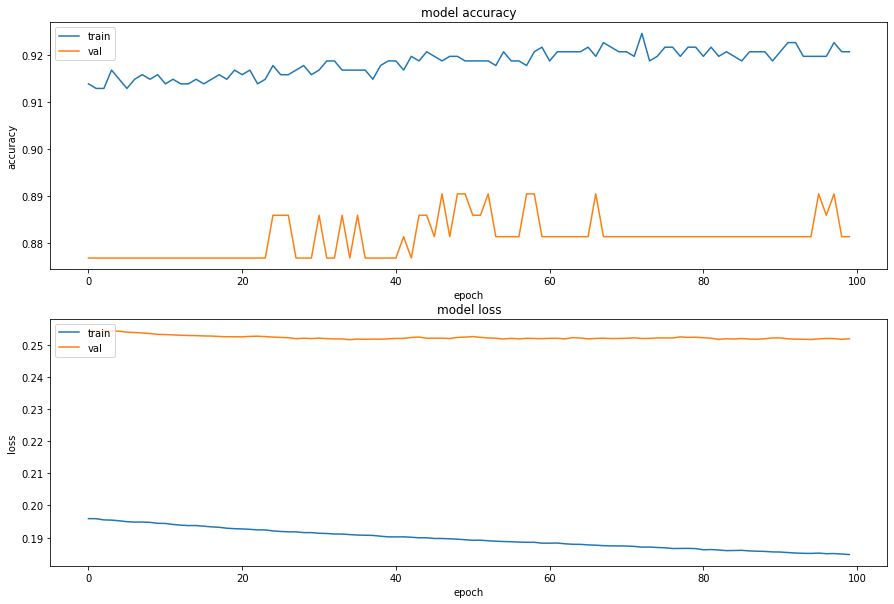

In [30]:
import matplotlib.pyplot as plt

print(history.history.keys())  



plt.figure(1,figsize=(15,10))  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  

# summarize history for loss  

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  
plt.show()  

In [48]:
k1 = [2, 6, 10,15,20,30,40,50]
k2 = [2, 6, 10,15,20,30,40,50]

param_grid = dict(k1=k1, k2=k2)

In [45]:
import itertools

def grid_search(X_train, Y_train, X_val, Y_val, param_grid, get_model_function):
    
    
    results=pd.DataFrame(columns=['Tryout','k1','k2','accuracy'])
    i=0
    
    for k1 in param_grid['k1']:
        for k2 in param_grid['k2']:  
            model=get_model_function(k1=k1, k2=k2)
            history = model.fit(X_train,Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val))
            results.loc[i]=[i]+[k1]+[k2]+[history.history['val_accuracy'][-1]]
            i+=1  
            
    return resultsi[b], i[a] = i[a], i[b]

In [49]:
results = grid_search(X_train, Y_train, X_val, Y_val, param_grid, get_model)

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.8005 - accuracy: 0.4256 - val_loss: 0.7713 - val_accuracy: 0.3607
Epoch 2/100
1022/1022 [==============================] - 1s 525us/step - loss: 0.7473 - accuracy: 0.4374 - val_loss: 0.7340 - val_accuracy: 0.4247
Epoch 3/100
1022/1022 [==============================] - 0s 387us/step - loss: 0.7160 - accuracy: 0.4687 - val_loss: 0.7101 - val_accuracy: 0.4795
Epoch 4/100
1022/1022 [==============================] - 0s 275us/step - loss: 0.6948 - accuracy: 0.5039 - val_loss: 0.6929 - val_accuracy: 0.5114
Epoch 5/100
1022/1022 [==============================] - 0s 291us/step - loss: 0.6789 - accuracy: 0.5440 - val_loss: 0.6789 - val_accuracy: 0.5571
Epoch 6/100
1022/1022 [==============================] - 0s 206us/step - loss: 0.6650 - accuracy: 0.5763 - val_loss: 0.6660 - val_accuracy: 0.5753
Epoch 7/100
1022/1022 [==============================] - 0s 191us/step - 

1022/1022 [==============================] - 0s 155us/step - loss: 0.2878 - accuracy: 0.9041 - val_loss: 0.3372 - val_accuracy: 0.8630
Epoch 57/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.2860 - accuracy: 0.9051 - val_loss: 0.3356 - val_accuracy: 0.8676
Epoch 58/100
1022/1022 [==============================] - 0s 148us/step - loss: 0.2843 - accuracy: 0.9051 - val_loss: 0.3342 - val_accuracy: 0.8676
Epoch 59/100
1022/1022 [==============================] - 0s 123us/step - loss: 0.2828 - accuracy: 0.9051 - val_loss: 0.3329 - val_accuracy: 0.8676
Epoch 60/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.2813 - accuracy: 0.9061 - val_loss: 0.3317 - val_accuracy: 0.8676
Epoch 61/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2798 - accuracy: 0.9031 - val_loss: 0.3307 - val_accuracy: 0.8676
Epoch 62/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.2783 - accuracy: 0.9041 - val_loss: 0.3294 

1022/1022 [==============================] - 0s 176us/step - loss: 0.5125 - accuracy: 0.7583 - val_loss: 0.5053 - val_accuracy: 0.7717
Epoch 12/100
1022/1022 [==============================] - 0s 148us/step - loss: 0.4985 - accuracy: 0.7632 - val_loss: 0.4919 - val_accuracy: 0.7717
Epoch 13/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.4848 - accuracy: 0.8014 - val_loss: 0.4792 - val_accuracy: 0.7991
Epoch 14/100
1022/1022 [==============================] - 0s 145us/step - loss: 0.4716 - accuracy: 0.8180 - val_loss: 0.4672 - val_accuracy: 0.8037
Epoch 15/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.4590 - accuracy: 0.8219 - val_loss: 0.4560 - val_accuracy: 0.8219
Epoch 16/100
1022/1022 [==============================] - 0s 153us/step - loss: 0.4471 - accuracy: 0.8239 - val_loss: 0.4452 - val_accuracy: 0.8219
Epoch 17/100
1022/1022 [==============================] - 0s 170us/step - loss: 0.4357 - accuracy: 0.8278 - val_loss: 0.4344 

1022/1022 [==============================] - 0s 141us/step - loss: 0.2456 - accuracy: 0.8953 - val_loss: 0.2858 - val_accuracy: 0.8676
Epoch 67/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.2447 - accuracy: 0.8953 - val_loss: 0.2853 - val_accuracy: 0.8676
Epoch 68/100
1022/1022 [==============================] - 0s 149us/step - loss: 0.2439 - accuracy: 0.8953 - val_loss: 0.2847 - val_accuracy: 0.8676
Epoch 69/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.2432 - accuracy: 0.8953 - val_loss: 0.2841 - val_accuracy: 0.8721
Epoch 70/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2424 - accuracy: 0.8953 - val_loss: 0.2836 - val_accuracy: 0.8721
Epoch 71/100
1022/1022 [==============================] - 0s 132us/step - loss: 0.2417 - accuracy: 0.8953 - val_loss: 0.2831 - val_accuracy: 0.8721
Epoch 72/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2410 - accuracy: 0.8963 - val_loss: 0.2826 

1022/1022 [==============================] - 0s 142us/step - loss: 0.2927 - accuracy: 0.8855 - val_loss: 0.3454 - val_accuracy: 0.8402
Epoch 22/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2888 - accuracy: 0.8894 - val_loss: 0.3434 - val_accuracy: 0.8447
Epoch 23/100
1022/1022 [==============================] - 0s 140us/step - loss: 0.2853 - accuracy: 0.8894 - val_loss: 0.3416 - val_accuracy: 0.8447
Epoch 24/100
1022/1022 [==============================] - 0s 140us/step - loss: 0.2821 - accuracy: 0.8904 - val_loss: 0.3400 - val_accuracy: 0.8447
Epoch 25/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2793 - accuracy: 0.8904 - val_loss: 0.3378 - val_accuracy: 0.8447
Epoch 26/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2767 - accuracy: 0.8924 - val_loss: 0.3358 - val_accuracy: 0.8447
Epoch 27/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.2744 - accuracy: 0.8933 - val_loss: 0.3340 

1022/1022 [==============================] - 0s 156us/step - loss: 0.2404 - accuracy: 0.9031 - val_loss: 0.2920 - val_accuracy: 0.8584
Epoch 77/100
1022/1022 [==============================] - 0s 264us/step - loss: 0.2402 - accuracy: 0.9041 - val_loss: 0.2916 - val_accuracy: 0.8584
Epoch 78/100
1022/1022 [==============================] - 0s 332us/step - loss: 0.2400 - accuracy: 0.9041 - val_loss: 0.2912 - val_accuracy: 0.8584
Epoch 79/100
1022/1022 [==============================] - 0s 213us/step - loss: 0.2397 - accuracy: 0.9031 - val_loss: 0.2908 - val_accuracy: 0.8584
Epoch 80/100
1022/1022 [==============================] - 0s 125us/step - loss: 0.2396 - accuracy: 0.9041 - val_loss: 0.2905 - val_accuracy: 0.8584
Epoch 81/100
1022/1022 [==============================] - 0s 336us/step - loss: 0.2394 - accuracy: 0.9031 - val_loss: 0.2901 - val_accuracy: 0.8584
Epoch 82/100
1022/1022 [==============================] - 0s 218us/step - loss: 0.2392 - accuracy: 0.9031 - val_loss: 0.2898 

1022/1022 [==============================] - 0s 132us/step - loss: 0.4759 - accuracy: 0.8337 - val_loss: 0.5118 - val_accuracy: 0.7763
Epoch 32/100
1022/1022 [==============================] - 0s 170us/step - loss: 0.4669 - accuracy: 0.8337 - val_loss: 0.5044 - val_accuracy: 0.7763
Epoch 33/100
1022/1022 [==============================] - 0s 165us/step - loss: 0.4583 - accuracy: 0.8415 - val_loss: 0.4974 - val_accuracy: 0.7854
Epoch 34/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.4503 - accuracy: 0.8415 - val_loss: 0.4908 - val_accuracy: 0.7900
Epoch 35/100
1022/1022 [==============================] - 0s 112us/step - loss: 0.4426 - accuracy: 0.8454 - val_loss: 0.4844 - val_accuracy: 0.7991
Epoch 36/100
1022/1022 [==============================] - 0s 118us/step - loss: 0.4354 - accuracy: 0.8562 - val_loss: 0.4784 - val_accuracy: 0.7945
Epoch 37/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.4285 - accuracy: 0.8552 - val_loss: 0.4726 

1022/1022 [==============================] - 0s 158us/step - loss: 0.2822 - accuracy: 0.8914 - val_loss: 0.3443 - val_accuracy: 0.8493
Epoch 87/100
1022/1022 [==============================] - 0s 145us/step - loss: 0.2810 - accuracy: 0.8924 - val_loss: 0.3432 - val_accuracy: 0.8493
Epoch 88/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2798 - accuracy: 0.8924 - val_loss: 0.3420 - val_accuracy: 0.8493
Epoch 89/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2787 - accuracy: 0.8933 - val_loss: 0.3411 - val_accuracy: 0.8493
Epoch 90/100
1022/1022 [==============================] - 0s 132us/step - loss: 0.2776 - accuracy: 0.8963 - val_loss: 0.3399 - val_accuracy: 0.8493
Epoch 91/100
1022/1022 [==============================] - 0s 111us/step - loss: 0.2766 - accuracy: 0.8963 - val_loss: 0.3389 - val_accuracy: 0.8493
Epoch 92/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2756 - accuracy: 0.8963 - val_loss: 0.3379 

1022/1022 [==============================] - 0s 133us/step - loss: 0.2933 - accuracy: 0.8894 - val_loss: 0.3870 - val_accuracy: 0.8356
Epoch 42/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.2908 - accuracy: 0.8914 - val_loss: 0.3855 - val_accuracy: 0.8356
Epoch 43/100
1022/1022 [==============================] - 0s 120us/step - loss: 0.2885 - accuracy: 0.8933 - val_loss: 0.3841 - val_accuracy: 0.8356
Epoch 44/100
1022/1022 [==============================] - 0s 140us/step - loss: 0.2863 - accuracy: 0.8953 - val_loss: 0.3826 - val_accuracy: 0.8402
Epoch 45/100
1022/1022 [==============================] - 0s 113us/step - loss: 0.2843 - accuracy: 0.8933 - val_loss: 0.3813 - val_accuracy: 0.8402
Epoch 46/100
1022/1022 [==============================] - 0s 114us/step - loss: 0.2824 - accuracy: 0.8953 - val_loss: 0.3800 - val_accuracy: 0.8447
Epoch 47/100
1022/1022 [==============================] - 0s 112us/step - loss: 0.2806 - accuracy: 0.8953 - val_loss: 0.3787 

1022/1022 [==============================] - 0s 123us/step - loss: 0.2416 - accuracy: 0.8992 - val_loss: 0.3060 - val_accuracy: 0.8584
Epoch 97/100
1022/1022 [==============================] - 0s 200us/step - loss: 0.2412 - accuracy: 0.9002 - val_loss: 0.3052 - val_accuracy: 0.8584
Epoch 98/100
1022/1022 [==============================] - 0s 107us/step - loss: 0.2409 - accuracy: 0.8992 - val_loss: 0.3045 - val_accuracy: 0.8584
Epoch 99/100
1022/1022 [==============================] - 0s 155us/step - loss: 0.2405 - accuracy: 0.8992 - val_loss: 0.3039 - val_accuracy: 0.8584
Epoch 100/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.2403 - accuracy: 0.8982 - val_loss: 0.3033 - val_accuracy: 0.8584
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 798us/step - loss: 0.7008 - accuracy: 0.5411 - val_loss: 0.6971 - val_accuracy: 0.5662
Epoch 2/100
1022/1022 [==============================] - 0s 125us/step - loss:

1022/1022 [==============================] - 0s 126us/step - loss: 0.2850 - accuracy: 0.8943 - val_loss: 0.3518 - val_accuracy: 0.8493
Epoch 52/100
1022/1022 [==============================] - 0s 200us/step - loss: 0.2836 - accuracy: 0.8933 - val_loss: 0.3513 - val_accuracy: 0.8493
Epoch 53/100
1022/1022 [==============================] - 0s 360us/step - loss: 0.2825 - accuracy: 0.8933 - val_loss: 0.3506 - val_accuracy: 0.8493
Epoch 54/100
1022/1022 [==============================] - 0s 140us/step - loss: 0.2812 - accuracy: 0.8943 - val_loss: 0.3501 - val_accuracy: 0.8493
Epoch 55/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2803 - accuracy: 0.8953 - val_loss: 0.3496 - val_accuracy: 0.8493
Epoch 56/100
1022/1022 [==============================] - 0s 124us/step - loss: 0.2792 - accuracy: 0.8953 - val_loss: 0.3490 - val_accuracy: 0.8493
Epoch 57/100
1022/1022 [==============================] - 0s 273us/step - loss: 0.2780 - accuracy: 0.8953 - val_loss: 0.3484 

1022/1022 [==============================] - 0s 458us/step - loss: 0.6700 - accuracy: 0.6233 - val_loss: 0.6671 - val_accuracy: 0.6256
Epoch 7/100
1022/1022 [==============================] - 0s 95us/step - loss: 0.6637 - accuracy: 0.6526 - val_loss: 0.6606 - val_accuracy: 0.6438
Epoch 8/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.6564 - accuracy: 0.6595 - val_loss: 0.6532 - val_accuracy: 0.6621
Epoch 9/100
1022/1022 [==============================] - 0s 98us/step - loss: 0.6475 - accuracy: 0.6849 - val_loss: 0.6444 - val_accuracy: 0.6986
Epoch 10/100
1022/1022 [==============================] - 0s 93us/step - loss: 0.6367 - accuracy: 0.7025 - val_loss: 0.6343 - val_accuracy: 0.7215
Epoch 11/100
1022/1022 [==============================] - 0s 96us/step - loss: 0.6242 - accuracy: 0.7329 - val_loss: 0.6229 - val_accuracy: 0.7260
Epoch 12/100
1022/1022 [==============================] - ETA: 0s - loss: 0.6144 - accuracy: 0.74 - 0s 95us/step - loss: 0.6104 - acc

1022/1022 [==============================] - 0s 98us/step - loss: 0.2676 - accuracy: 0.8943 - val_loss: 0.3207 - val_accuracy: 0.8721
Epoch 62/100
1022/1022 [==============================] - 0s 96us/step - loss: 0.2666 - accuracy: 0.8943 - val_loss: 0.3197 - val_accuracy: 0.8721
Epoch 63/100
1022/1022 [==============================] - 0s 99us/step - loss: 0.2656 - accuracy: 0.8943 - val_loss: 0.3188 - val_accuracy: 0.8721
Epoch 64/100
1022/1022 [==============================] - 0s 99us/step - loss: 0.2646 - accuracy: 0.8943 - val_loss: 0.3180 - val_accuracy: 0.8721
Epoch 65/100
1022/1022 [==============================] - 0s 98us/step - loss: 0.2636 - accuracy: 0.8953 - val_loss: 0.3171 - val_accuracy: 0.8721
Epoch 66/100
1022/1022 [==============================] - 0s 100us/step - loss: 0.2628 - accuracy: 0.8953 - val_loss: 0.3162 - val_accuracy: 0.8721
Epoch 67/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.2620 - accuracy: 0.8973 - val_loss: 0.3152 - val_

1022/1022 [==============================] - 0s 93us/step - loss: 0.4576 - accuracy: 0.8513 - val_loss: 0.5034 - val_accuracy: 0.7900
Epoch 17/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.4480 - accuracy: 0.8542 - val_loss: 0.4949 - val_accuracy: 0.7945
Epoch 18/100
1022/1022 [==============================] - 0s 107us/step - loss: 0.4390 - accuracy: 0.8571 - val_loss: 0.4870 - val_accuracy: 0.7991
Epoch 19/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.4305 - accuracy: 0.8591 - val_loss: 0.4795 - val_accuracy: 0.7991
Epoch 20/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.4223 - accuracy: 0.8611 - val_loss: 0.4722 - val_accuracy: 0.7991
Epoch 21/100
1022/1022 [==============================] - 0s 107us/step - loss: 0.4146 - accuracy: 0.8630 - val_loss: 0.4652 - val_accuracy: 0.8037
Epoch 22/100
1022/1022 [==============================] - 0s 90us/step - loss: 0.4073 - accuracy: 0.8679 - val_loss: 0.4585 - 

1022/1022 [==============================] - 0s 105us/step - loss: 0.2723 - accuracy: 0.8924 - val_loss: 0.3358 - val_accuracy: 0.8584
Epoch 72/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.2712 - accuracy: 0.8943 - val_loss: 0.3346 - val_accuracy: 0.8584
Epoch 73/100
1022/1022 [==============================] - 0s 102us/step - loss: 0.2702 - accuracy: 0.8953 - val_loss: 0.3333 - val_accuracy: 0.8584
Epoch 74/100
1022/1022 [==============================] - 0s 106us/step - loss: 0.2693 - accuracy: 0.8943 - val_loss: 0.3322 - val_accuracy: 0.8584
Epoch 75/100
1022/1022 [==============================] - 0s 103us/step - loss: 0.2682 - accuracy: 0.8933 - val_loss: 0.3310 - val_accuracy: 0.8584
Epoch 76/100
1022/1022 [==============================] - 0s 108us/step - loss: 0.2673 - accuracy: 0.8943 - val_loss: 0.3299 - val_accuracy: 0.8584
Epoch 77/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.2663 - accuracy: 0.8943 - val_loss: 0.3286 

1022/1022 [==============================] - 0s 104us/step - loss: 0.3501 - accuracy: 0.8757 - val_loss: 0.3964 - val_accuracy: 0.8493
Epoch 27/100
1022/1022 [==============================] - 0s 267us/step - loss: 0.3427 - accuracy: 0.8767 - val_loss: 0.3904 - val_accuracy: 0.8447
Epoch 28/100
1022/1022 [==============================] - 0s 315us/step - loss: 0.3359 - accuracy: 0.8787 - val_loss: 0.3848 - val_accuracy: 0.8447
Epoch 29/100
1022/1022 [==============================] - 0s 149us/step - loss: 0.3295 - accuracy: 0.8816 - val_loss: 0.3797 - val_accuracy: 0.8402
Epoch 30/100
1022/1022 [==============================] - 0s 101us/step - loss: 0.3236 - accuracy: 0.8836 - val_loss: 0.3750 - val_accuracy: 0.8402
Epoch 31/100
1022/1022 [==============================] - 0s 98us/step - loss: 0.3180 - accuracy: 0.8845 - val_loss: 0.3708 - val_accuracy: 0.8402
Epoch 32/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.3129 - accuracy: 0.8845 - val_loss: 0.3668 - 

1022/1022 [==============================] - 0s 93us/step - loss: 0.2344 - accuracy: 0.9031 - val_loss: 0.2895 - val_accuracy: 0.8630
Epoch 82/100
1022/1022 [==============================] - 0s 98us/step - loss: 0.2340 - accuracy: 0.9031 - val_loss: 0.2889 - val_accuracy: 0.8630
Epoch 83/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.2336 - accuracy: 0.9031 - val_loss: 0.2883 - val_accuracy: 0.8630
Epoch 84/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.2332 - accuracy: 0.9031 - val_loss: 0.2878 - val_accuracy: 0.8630
Epoch 85/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.2330 - accuracy: 0.9041 - val_loss: 0.2872 - val_accuracy: 0.8630
Epoch 86/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.2326 - accuracy: 0.9041 - val_loss: 0.2865 - val_accuracy: 0.8630
Epoch 87/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.2322 - accuracy: 0.9041 - val_loss: 0.2861 - val_a

1022/1022 [==============================] - 0s 107us/step - loss: 0.2694 - accuracy: 0.9012 - val_loss: 0.3470 - val_accuracy: 0.8676
Epoch 37/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.2669 - accuracy: 0.8992 - val_loss: 0.3449 - val_accuracy: 0.8676
Epoch 38/100
1022/1022 [==============================] - 0s 115us/step - loss: 0.2646 - accuracy: 0.9002 - val_loss: 0.3429 - val_accuracy: 0.8676
Epoch 39/100
1022/1022 [==============================] - 0s 141us/step - loss: 0.2625 - accuracy: 0.9012 - val_loss: 0.3411 - val_accuracy: 0.8676
Epoch 40/100
1022/1022 [==============================] - 0s 103us/step - loss: 0.2605 - accuracy: 0.9012 - val_loss: 0.3394 - val_accuracy: 0.8676
Epoch 41/100
1022/1022 [==============================] - 0s 90us/step - loss: 0.2586 - accuracy: 0.9031 - val_loss: 0.3379 - val_accuracy: 0.8676
Epoch 42/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.2568 - accuracy: 0.9031 - val_loss: 0.3364 -

1022/1022 [==============================] - 0s 181us/step - loss: 0.2217 - accuracy: 0.9090 - val_loss: 0.2952 - val_accuracy: 0.8904
Epoch 92/100
1022/1022 [==============================] - 0s 132us/step - loss: 0.2214 - accuracy: 0.9090 - val_loss: 0.2949 - val_accuracy: 0.8904
Epoch 93/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2211 - accuracy: 0.9100 - val_loss: 0.2947 - val_accuracy: 0.8858
Epoch 94/100
1022/1022 [==============================] - 0s 129us/step - loss: 0.2208 - accuracy: 0.9090 - val_loss: 0.2944 - val_accuracy: 0.8858
Epoch 95/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.2206 - accuracy: 0.9110 - val_loss: 0.2941 - val_accuracy: 0.8858
Epoch 96/100
1022/1022 [==============================] - 0s 103us/step - loss: 0.2204 - accuracy: 0.9110 - val_loss: 0.2937 - val_accuracy: 0.8813
Epoch 97/100
1022/1022 [==============================] - 0s 109us/step - loss: 0.2201 - accuracy: 0.9110 - val_loss: 0.2934 

1022/1022 [==============================] - 0s 128us/step - loss: 0.2543 - accuracy: 0.8943 - val_loss: 0.3353 - val_accuracy: 0.8539
Epoch 47/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.2534 - accuracy: 0.8943 - val_loss: 0.3344 - val_accuracy: 0.8539
Epoch 48/100
1022/1022 [==============================] - 0s 134us/step - loss: 0.2524 - accuracy: 0.8953 - val_loss: 0.3336 - val_accuracy: 0.8584
Epoch 49/100
1022/1022 [==============================] - 0s 129us/step - loss: 0.2516 - accuracy: 0.8963 - val_loss: 0.3328 - val_accuracy: 0.8584
Epoch 50/100
1022/1022 [==============================] - 0s 109us/step - loss: 0.2508 - accuracy: 0.8933 - val_loss: 0.3321 - val_accuracy: 0.8584
Epoch 51/100
1022/1022 [==============================] - 0s 122us/step - loss: 0.2500 - accuracy: 0.8963 - val_loss: 0.3314 - val_accuracy: 0.8584
Epoch 52/100
1022/1022 [==============================] - 0s 113us/step - loss: 0.2493 - accuracy: 0.8963 - val_loss: 0.3308 

1022/1022 [==============================] - 1s 936us/step - loss: 0.6751 - accuracy: 0.6252 - val_loss: 0.6550 - val_accuracy: 0.6256
Epoch 2/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.6387 - accuracy: 0.6820 - val_loss: 0.6298 - val_accuracy: 0.7032
Epoch 3/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.6120 - accuracy: 0.7202 - val_loss: 0.6086 - val_accuracy: 0.7443
Epoch 4/100
1022/1022 [==============================] - 0s 140us/step - loss: 0.5887 - accuracy: 0.7524 - val_loss: 0.5891 - val_accuracy: 0.7580
Epoch 5/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.5675 - accuracy: 0.7691 - val_loss: 0.5710 - val_accuracy: 0.7763
Epoch 6/100
1022/1022 [==============================] - 0s 140us/step - loss: 0.5478 - accuracy: 0.7838 - val_loss: 0.5537 - val_accuracy: 0.7808
Epoch 7/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.5290 - accuracy: 0.7975 - val_loss: 0.5372 - val_

1022/1022 [==============================] - 0s 168us/step - loss: 0.2396 - accuracy: 0.9051 - val_loss: 0.3176 - val_accuracy: 0.8630
Epoch 57/100
1022/1022 [==============================] - 0s 154us/step - loss: 0.2389 - accuracy: 0.9061 - val_loss: 0.3168 - val_accuracy: 0.8630
Epoch 58/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2381 - accuracy: 0.9051 - val_loss: 0.3161 - val_accuracy: 0.8584
Epoch 59/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2376 - accuracy: 0.9070 - val_loss: 0.3154 - val_accuracy: 0.8630
Epoch 60/100
1022/1022 [==============================] - 0s 141us/step - loss: 0.2367 - accuracy: 0.9080 - val_loss: 0.3146 - val_accuracy: 0.8676
Epoch 61/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2361 - accuracy: 0.9070 - val_loss: 0.3139 - val_accuracy: 0.8676
Epoch 62/100
1022/1022 [==============================] - 0s 113us/step - loss: 0.2355 - accuracy: 0.9080 - val_loss: 0.3133 

1022/1022 [==============================] - 0s 205us/step - loss: 0.3586 - accuracy: 0.8708 - val_loss: 0.4506 - val_accuracy: 0.8311
Epoch 12/100
1022/1022 [==============================] - 0s 144us/step - loss: 0.3475 - accuracy: 0.8738 - val_loss: 0.4410 - val_accuracy: 0.8311
Epoch 13/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.3380 - accuracy: 0.8757 - val_loss: 0.4325 - val_accuracy: 0.8311
Epoch 14/100
1022/1022 [==============================] - 0s 154us/step - loss: 0.3296 - accuracy: 0.8757 - val_loss: 0.4244 - val_accuracy: 0.8265
Epoch 15/100
1022/1022 [==============================] - 0s 154us/step - loss: 0.3223 - accuracy: 0.8767 - val_loss: 0.4174 - val_accuracy: 0.8265
Epoch 16/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.3160 - accuracy: 0.8767 - val_loss: 0.4115 - val_accuracy: 0.8265
Epoch 17/100
1022/1022 [==============================] - 0s 132us/step - loss: 0.3104 - accuracy: 0.8777 - val_loss: 0.4061 

1022/1022 [==============================] - 0s 168us/step - loss: 0.2382 - accuracy: 0.9002 - val_loss: 0.3277 - val_accuracy: 0.8493
Epoch 67/100
1022/1022 [==============================] - 0s 120us/step - loss: 0.2379 - accuracy: 0.9012 - val_loss: 0.3271 - val_accuracy: 0.8493
Epoch 68/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2373 - accuracy: 0.9012 - val_loss: 0.3266 - val_accuracy: 0.8493
Epoch 69/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2368 - accuracy: 0.9031 - val_loss: 0.3259 - val_accuracy: 0.8493
Epoch 70/100
1022/1022 [==============================] - 0s 161us/step - loss: 0.2363 - accuracy: 0.9002 - val_loss: 0.3253 - val_accuracy: 0.8493
Epoch 71/100
1022/1022 [==============================] - 0s 183us/step - loss: 0.2359 - accuracy: 0.9022 - val_loss: 0.3247 - val_accuracy: 0.8539
Epoch 72/100
1022/1022 [==============================] - 0s 120us/step - loss: 0.2356 - accuracy: 0.9031 - val_loss: 0.3241 

1022/1022 [==============================] - 0s 267us/step - loss: 0.3809 - accuracy: 0.8611 - val_loss: 0.3854 - val_accuracy: 0.8813
Epoch 22/100
1022/1022 [==============================] - 0s 203us/step - loss: 0.3697 - accuracy: 0.8679 - val_loss: 0.3772 - val_accuracy: 0.8904
Epoch 23/100
1022/1022 [==============================] - 0s 180us/step - loss: 0.3593 - accuracy: 0.8757 - val_loss: 0.3700 - val_accuracy: 0.8858
Epoch 24/100
1022/1022 [==============================] - 0s 184us/step - loss: 0.3496 - accuracy: 0.8767 - val_loss: 0.3634 - val_accuracy: 0.8858
Epoch 25/100
1022/1022 [==============================] - 0s 220us/step - loss: 0.3407 - accuracy: 0.8806 - val_loss: 0.3575 - val_accuracy: 0.8767
Epoch 26/100
1022/1022 [==============================] - 0s 217us/step - loss: 0.3325 - accuracy: 0.8826 - val_loss: 0.3523 - val_accuracy: 0.8767
Epoch 27/100
1022/1022 [==============================] - 0s 189us/step - loss: 0.3250 - accuracy: 0.8865 - val_loss: 0.3477 

1022/1022 [==============================] - 0s 105us/step - loss: 0.2371 - accuracy: 0.9022 - val_loss: 0.2919 - val_accuracy: 0.8721
Epoch 77/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.2367 - accuracy: 0.9022 - val_loss: 0.2916 - val_accuracy: 0.8721
Epoch 78/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.2365 - accuracy: 0.9012 - val_loss: 0.2911 - val_accuracy: 0.8721
Epoch 79/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.2361 - accuracy: 0.9022 - val_loss: 0.2908 - val_accuracy: 0.8767
Epoch 80/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2356 - accuracy: 0.9022 - val_loss: 0.2904 - val_accuracy: 0.8767
Epoch 81/100
1022/1022 [==============================] - 0s 128us/step - loss: 0.2351 - accuracy: 0.9012 - val_loss: 0.2901 - val_accuracy: 0.8767
Epoch 82/100
1022/1022 [==============================] - 0s 103us/step - loss: 0.2348 - accuracy: 0.9022 - val_loss: 0.2897 

1022/1022 [==============================] - 0s 131us/step - loss: 0.2782 - accuracy: 0.8836 - val_loss: 0.3073 - val_accuracy: 0.8676
Epoch 32/100
1022/1022 [==============================] - 0s 107us/step - loss: 0.2762 - accuracy: 0.8826 - val_loss: 0.3060 - val_accuracy: 0.8676
Epoch 33/100
1022/1022 [==============================] - 0s 123us/step - loss: 0.2742 - accuracy: 0.8865 - val_loss: 0.3048 - val_accuracy: 0.8767
Epoch 34/100
1022/1022 [==============================] - 0s 93us/step - loss: 0.2725 - accuracy: 0.8855 - val_loss: 0.3037 - val_accuracy: 0.8767
Epoch 35/100
1022/1022 [==============================] - 0s 102us/step - loss: 0.2708 - accuracy: 0.8845 - val_loss: 0.3027 - val_accuracy: 0.8813
Epoch 36/100
1022/1022 [==============================] - 0s 98us/step - loss: 0.2694 - accuracy: 0.8845 - val_loss: 0.3018 - val_accuracy: 0.8813
Epoch 37/100
1022/1022 [==============================] - 0s 100us/step - loss: 0.2681 - accuracy: 0.8845 - val_loss: 0.3008 - 

1022/1022 [==============================] - 0s 98us/step - loss: 0.2375 - accuracy: 0.9012 - val_loss: 0.2797 - val_accuracy: 0.8676
Epoch 87/100
1022/1022 [==============================] - 0s 95us/step - loss: 0.2371 - accuracy: 0.9012 - val_loss: 0.2793 - val_accuracy: 0.8676
Epoch 88/100
1022/1022 [==============================] - 0s 99us/step - loss: 0.2367 - accuracy: 0.9022 - val_loss: 0.2791 - val_accuracy: 0.8676
Epoch 89/100
1022/1022 [==============================] - 0s 98us/step - loss: 0.2364 - accuracy: 0.9022 - val_loss: 0.2786 - val_accuracy: 0.8676
Epoch 90/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.2360 - accuracy: 0.9022 - val_loss: 0.2785 - val_accuracy: 0.8676
Epoch 91/100
1022/1022 [==============================] - 0s 111us/step - loss: 0.2356 - accuracy: 0.9012 - val_loss: 0.2783 - val_accuracy: 0.8676
Epoch 92/100
1022/1022 [==============================] - 0s 95us/step - loss: 0.2354 - accuracy: 0.9022 - val_loss: 0.2782 - val_

1022/1022 [==============================] - 0s 301us/step - loss: 0.2597 - accuracy: 0.9061 - val_loss: 0.3445 - val_accuracy: 0.8584
Epoch 42/100
1022/1022 [==============================] - 0s 114us/step - loss: 0.2578 - accuracy: 0.9041 - val_loss: 0.3431 - val_accuracy: 0.8584
Epoch 43/100
1022/1022 [==============================] - 0s 111us/step - loss: 0.2559 - accuracy: 0.9061 - val_loss: 0.3418 - val_accuracy: 0.8584
Epoch 44/100
1022/1022 [==============================] - 0s 112us/step - loss: 0.2543 - accuracy: 0.9051 - val_loss: 0.3407 - val_accuracy: 0.8630
Epoch 45/100
1022/1022 [==============================] - 0s 113us/step - loss: 0.2527 - accuracy: 0.9061 - val_loss: 0.3396 - val_accuracy: 0.8630
Epoch 46/100
1022/1022 [==============================] - 0s 117us/step - loss: 0.2512 - accuracy: 0.9061 - val_loss: 0.3387 - val_accuracy: 0.8630
Epoch 47/100
1022/1022 [==============================] - 0s 115us/step - loss: 0.2499 - accuracy: 0.9090 - val_loss: 0.3377 

1022/1022 [==============================] - 0s 113us/step - loss: 0.2252 - accuracy: 0.9061 - val_loss: 0.3196 - val_accuracy: 0.8630
Epoch 97/100
1022/1022 [==============================] - 0s 113us/step - loss: 0.2250 - accuracy: 0.9080 - val_loss: 0.3194 - val_accuracy: 0.8630
Epoch 98/100
1022/1022 [==============================] - 0s 113us/step - loss: 0.2248 - accuracy: 0.9080 - val_loss: 0.3192 - val_accuracy: 0.8630
Epoch 99/100
1022/1022 [==============================] - 0s 112us/step - loss: 0.2246 - accuracy: 0.9070 - val_loss: 0.3189 - val_accuracy: 0.8676
Epoch 100/100
1022/1022 [==============================] - 0s 113us/step - loss: 0.2244 - accuracy: 0.9080 - val_loss: 0.3186 - val_accuracy: 0.8676
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 722us/step - loss: 0.7394 - accuracy: 0.4902 - val_loss: 0.7097 - val_accuracy: 0.5023
Epoch 2/100
1022/1022 [==============================] - 0s 106us/step - loss:

1022/1022 [==============================] - 0s 106us/step - loss: 0.3244 - accuracy: 0.8992 - val_loss: 0.3639 - val_accuracy: 0.8584
Epoch 52/100
1022/1022 [==============================] - 0s 102us/step - loss: 0.3226 - accuracy: 0.8992 - val_loss: 0.3628 - val_accuracy: 0.8584
Epoch 53/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.3210 - accuracy: 0.9002 - val_loss: 0.3618 - val_accuracy: 0.8584
Epoch 54/100
1022/1022 [==============================] - 0s 103us/step - loss: 0.3195 - accuracy: 0.8992 - val_loss: 0.3608 - val_accuracy: 0.8584
Epoch 55/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.3181 - accuracy: 0.9002 - val_loss: 0.3599 - val_accuracy: 0.8584
Epoch 56/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.3166 - accuracy: 0.9002 - val_loss: 0.3590 - val_accuracy: 0.8584
Epoch 57/100
1022/1022 [==============================] - 0s 210us/step - loss: 0.3154 - accuracy: 0.9012 - val_loss: 0.3581 

1022/1022 [==============================] - 0s 93us/step - loss: 0.5908 - accuracy: 0.7671 - val_loss: 0.6215 - val_accuracy: 0.7808
Epoch 7/100
1022/1022 [==============================] - 0s 102us/step - loss: 0.5710 - accuracy: 0.7955 - val_loss: 0.6034 - val_accuracy: 0.8037
Epoch 8/100
1022/1022 [==============================] - 0s 101us/step - loss: 0.5513 - accuracy: 0.8141 - val_loss: 0.5854 - val_accuracy: 0.8128
Epoch 9/100
1022/1022 [==============================] - 0s 98us/step - loss: 0.5318 - accuracy: 0.8278 - val_loss: 0.5673 - val_accuracy: 0.8219
Epoch 10/100
1022/1022 [==============================] - 0s 102us/step - loss: 0.5123 - accuracy: 0.8337 - val_loss: 0.5493 - val_accuracy: 0.8219
Epoch 11/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.4932 - accuracy: 0.8434 - val_loss: 0.5318 - val_accuracy: 0.8356
Epoch 12/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.4748 - accuracy: 0.8483 - val_loss: 0.5146 - val_a

1022/1022 [==============================] - 0s 248us/step - loss: 0.2346 - accuracy: 0.9100 - val_loss: 0.2916 - val_accuracy: 0.8813
Epoch 62/100
1022/1022 [==============================] - 0s 323us/step - loss: 0.2340 - accuracy: 0.9100 - val_loss: 0.2910 - val_accuracy: 0.8767
Epoch 63/100
1022/1022 [==============================] - 0s 257us/step - loss: 0.2336 - accuracy: 0.9119 - val_loss: 0.2904 - val_accuracy: 0.8767
Epoch 64/100
1022/1022 [==============================] - 0s 197us/step - loss: 0.2331 - accuracy: 0.9119 - val_loss: 0.2897 - val_accuracy: 0.8767
Epoch 65/100
1022/1022 [==============================] - 0s 296us/step - loss: 0.2326 - accuracy: 0.9119 - val_loss: 0.2890 - val_accuracy: 0.8767
Epoch 66/100
1022/1022 [==============================] - 0s 336us/step - loss: 0.2321 - accuracy: 0.9119 - val_loss: 0.2884 - val_accuracy: 0.8767
Epoch 67/100
1022/1022 [==============================] - 0s 297us/step - loss: 0.2317 - accuracy: 0.9129 - val_loss: 0.2877 

1022/1022 [==============================] - 0s 196us/step - loss: 0.3022 - accuracy: 0.8914 - val_loss: 0.3735 - val_accuracy: 0.8447
Epoch 17/100
1022/1022 [==============================] - 0s 109us/step - loss: 0.2967 - accuracy: 0.8924 - val_loss: 0.3703 - val_accuracy: 0.8539
Epoch 18/100
1022/1022 [==============================] - 0s 118us/step - loss: 0.2920 - accuracy: 0.8933 - val_loss: 0.3675 - val_accuracy: 0.8539
Epoch 19/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2877 - accuracy: 0.8963 - val_loss: 0.3648 - val_accuracy: 0.8539
Epoch 20/100
1022/1022 [==============================] - 0s 147us/step - loss: 0.2836 - accuracy: 0.8953 - val_loss: 0.3620 - val_accuracy: 0.8539
Epoch 21/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2798 - accuracy: 0.8963 - val_loss: 0.3594 - val_accuracy: 0.8493
Epoch 22/100
1022/1022 [==============================] - 0s 147us/step - loss: 0.2765 - accuracy: 0.8963 - val_loss: 0.3570 

1022/1022 [==============================] - 0s 178us/step - loss: 0.2246 - accuracy: 0.9041 - val_loss: 0.3005 - val_accuracy: 0.8767
Epoch 72/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.2242 - accuracy: 0.9041 - val_loss: 0.3001 - val_accuracy: 0.8721
Epoch 73/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.2240 - accuracy: 0.9051 - val_loss: 0.2996 - val_accuracy: 0.8721
Epoch 74/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.2237 - accuracy: 0.9051 - val_loss: 0.2993 - val_accuracy: 0.8721
Epoch 75/100
1022/1022 [==============================] - 0s 120us/step - loss: 0.2236 - accuracy: 0.9031 - val_loss: 0.2990 - val_accuracy: 0.8721
Epoch 76/100
1022/1022 [==============================] - 0s 134us/step - loss: 0.2232 - accuracy: 0.9031 - val_loss: 0.2986 - val_accuracy: 0.8721
Epoch 77/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.2230 - accuracy: 0.9070 - val_loss: 0.2982 

1022/1022 [==============================] - 0s 162us/step - loss: 0.3037 - accuracy: 0.8875 - val_loss: 0.3192 - val_accuracy: 0.8858
Epoch 27/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2970 - accuracy: 0.8875 - val_loss: 0.3150 - val_accuracy: 0.8904
Epoch 28/100
1022/1022 [==============================] - 0s 144us/step - loss: 0.2912 - accuracy: 0.8894 - val_loss: 0.3114 - val_accuracy: 0.8904
Epoch 29/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2860 - accuracy: 0.8924 - val_loss: 0.3085 - val_accuracy: 0.8904
Epoch 30/100
1022/1022 [==============================] - 0s 121us/step - loss: 0.2815 - accuracy: 0.8924 - val_loss: 0.3060 - val_accuracy: 0.8904
Epoch 31/100
1022/1022 [==============================] - 0s 118us/step - loss: 0.2776 - accuracy: 0.8973 - val_loss: 0.3040 - val_accuracy: 0.8904
Epoch 32/100
1022/1022 [==============================] - 0s 120us/step - loss: 0.2740 - accuracy: 0.8982 - val_loss: 0.3025 

1022/1022 [==============================] - 0s 154us/step - loss: 0.2314 - accuracy: 0.9022 - val_loss: 0.2833 - val_accuracy: 0.8721
Epoch 82/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.2311 - accuracy: 0.9031 - val_loss: 0.2830 - val_accuracy: 0.8721
Epoch 83/100
1022/1022 [==============================] - 0s 112us/step - loss: 0.2309 - accuracy: 0.9041 - val_loss: 0.2828 - val_accuracy: 0.8721
Epoch 84/100
1022/1022 [==============================] - 0s 166us/step - loss: 0.2306 - accuracy: 0.9031 - val_loss: 0.2824 - val_accuracy: 0.8721
Epoch 85/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2303 - accuracy: 0.9031 - val_loss: 0.2821 - val_accuracy: 0.8721
Epoch 86/100
1022/1022 [==============================] - 0s 116us/step - loss: 0.2300 - accuracy: 0.9031 - val_loss: 0.2817 - val_accuracy: 0.8721
Epoch 87/100
1022/1022 [==============================] - 0s 123us/step - loss: 0.2299 - accuracy: 0.9051 - val_loss: 0.2814 

1022/1022 [==============================] - 0s 173us/step - loss: 0.2331 - accuracy: 0.9012 - val_loss: 0.2884 - val_accuracy: 0.8676
Epoch 37/100
1022/1022 [==============================] - 0s 163us/step - loss: 0.2323 - accuracy: 0.9012 - val_loss: 0.2878 - val_accuracy: 0.8676
Epoch 38/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2315 - accuracy: 0.9022 - val_loss: 0.2872 - val_accuracy: 0.8676
Epoch 39/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.2307 - accuracy: 0.9012 - val_loss: 0.2868 - val_accuracy: 0.8676
Epoch 40/100
1022/1022 [==============================] - 0s 129us/step - loss: 0.2302 - accuracy: 0.9022 - val_loss: 0.2863 - val_accuracy: 0.8676
Epoch 41/100
1022/1022 [==============================] - 0s 132us/step - loss: 0.2295 - accuracy: 0.9012 - val_loss: 0.2857 - val_accuracy: 0.8676
Epoch 42/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2289 - accuracy: 0.9012 - val_loss: 0.2855 

1022/1022 [==============================] - 0s 170us/step - loss: 0.2137 - accuracy: 0.9070 - val_loss: 0.2722 - val_accuracy: 0.8676
Epoch 92/100
1022/1022 [==============================] - 0s 145us/step - loss: 0.2136 - accuracy: 0.9051 - val_loss: 0.2719 - val_accuracy: 0.8676
Epoch 93/100
1022/1022 [==============================] - 0s 143us/step - loss: 0.2134 - accuracy: 0.9051 - val_loss: 0.2717 - val_accuracy: 0.8676
Epoch 94/100
1022/1022 [==============================] - 0s 144us/step - loss: 0.2132 - accuracy: 0.9061 - val_loss: 0.2715 - val_accuracy: 0.8676
Epoch 95/100
1022/1022 [==============================] - 0s 144us/step - loss: 0.2129 - accuracy: 0.9061 - val_loss: 0.2712 - val_accuracy: 0.8676
Epoch 96/100
1022/1022 [==============================] - 0s 124us/step - loss: 0.2129 - accuracy: 0.9061 - val_loss: 0.2709 - val_accuracy: 0.8676
Epoch 97/100
1022/1022 [==============================] - 0s 113us/step - loss: 0.2127 - accuracy: 0.9070 - val_loss: 0.2707 

1022/1022 [==============================] - 0s 174us/step - loss: 0.2340 - accuracy: 0.9061 - val_loss: 0.3048 - val_accuracy: 0.8630
Epoch 47/100
1022/1022 [==============================] - 0s 180us/step - loss: 0.2333 - accuracy: 0.9051 - val_loss: 0.3040 - val_accuracy: 0.8630
Epoch 48/100
1022/1022 [==============================] - 0s 162us/step - loss: 0.2326 - accuracy: 0.9061 - val_loss: 0.3030 - val_accuracy: 0.8630
Epoch 49/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2320 - accuracy: 0.9051 - val_loss: 0.3022 - val_accuracy: 0.8630
Epoch 50/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.2315 - accuracy: 0.9051 - val_loss: 0.3014 - val_accuracy: 0.8630
Epoch 51/100
1022/1022 [==============================] - 0s 148us/step - loss: 0.2307 - accuracy: 0.9051 - val_loss: 0.3007 - val_accuracy: 0.8630
Epoch 52/100
1022/1022 [==============================] - 0s 190us/step - loss: 0.2299 - accuracy: 0.9041 - val_loss: 0.3000 

1022/1022 [==============================] - 1s 889us/step - loss: 0.6757 - accuracy: 0.5822 - val_loss: 0.6809 - val_accuracy: 0.5845
Epoch 2/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.6256 - accuracy: 0.6663 - val_loss: 0.6418 - val_accuracy: 0.6301
Epoch 3/100
1022/1022 [==============================] - 0s 132us/step - loss: 0.5894 - accuracy: 0.7074 - val_loss: 0.6110 - val_accuracy: 0.6575
Epoch 4/100
1022/1022 [==============================] - 0s 140us/step - loss: 0.5587 - accuracy: 0.7544 - val_loss: 0.5849 - val_accuracy: 0.6941
Epoch 5/100
1022/1022 [==============================] - 0s 162us/step - loss: 0.5305 - accuracy: 0.7828 - val_loss: 0.5608 - val_accuracy: 0.7123
Epoch 6/100
1022/1022 [==============================] - 0s 141us/step - loss: 0.5040 - accuracy: 0.8004 - val_loss: 0.5384 - val_accuracy: 0.7397
Epoch 7/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.4788 - accuracy: 0.8121 - val_loss: 0.5174 - val_

1022/1022 [==============================] - 0s 111us/step - loss: 0.2335 - accuracy: 0.9051 - val_loss: 0.3173 - val_accuracy: 0.8402
Epoch 57/100
1022/1022 [==============================] - 0s 123us/step - loss: 0.2329 - accuracy: 0.9051 - val_loss: 0.3166 - val_accuracy: 0.8447
Epoch 58/100
1022/1022 [==============================] - 0s 112us/step - loss: 0.2324 - accuracy: 0.9061 - val_loss: 0.3159 - val_accuracy: 0.8447
Epoch 59/100
1022/1022 [==============================] - 0s 124us/step - loss: 0.2318 - accuracy: 0.9051 - val_loss: 0.3152 - val_accuracy: 0.8447
Epoch 60/100
1022/1022 [==============================] - 0s 121us/step - loss: 0.2313 - accuracy: 0.9051 - val_loss: 0.3146 - val_accuracy: 0.8447
Epoch 61/100
1022/1022 [==============================] - 0s 112us/step - loss: 0.2307 - accuracy: 0.9070 - val_loss: 0.3139 - val_accuracy: 0.8447
Epoch 62/100
1022/1022 [==============================] - 0s 114us/step - loss: 0.2303 - accuracy: 0.9070 - val_loss: 0.3133 

1022/1022 [==============================] - 0s 111us/step - loss: 0.3574 - accuracy: 0.8836 - val_loss: 0.3885 - val_accuracy: 0.8311
Epoch 12/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.3401 - accuracy: 0.8845 - val_loss: 0.3747 - val_accuracy: 0.8311
Epoch 13/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.3253 - accuracy: 0.8865 - val_loss: 0.3631 - val_accuracy: 0.8402
Epoch 14/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.3128 - accuracy: 0.8855 - val_loss: 0.3535 - val_accuracy: 0.8493
Epoch 15/100
1022/1022 [==============================] - 0s 138us/step - loss: 0.3024 - accuracy: 0.8894 - val_loss: 0.3456 - val_accuracy: 0.8539
Epoch 16/100
1022/1022 [==============================] - 0s 141us/step - loss: 0.2934 - accuracy: 0.8933 - val_loss: 0.3390 - val_accuracy: 0.8539
Epoch 17/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2858 - accuracy: 0.8933 - val_loss: 0.3337 

1022/1022 [==============================] - 0s 118us/step - loss: 0.2198 - accuracy: 0.9159 - val_loss: 0.2961 - val_accuracy: 0.8584
Epoch 67/100
1022/1022 [==============================] - 0s 114us/step - loss: 0.2195 - accuracy: 0.9159 - val_loss: 0.2956 - val_accuracy: 0.8584
Epoch 68/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.2192 - accuracy: 0.9168 - val_loss: 0.2952 - val_accuracy: 0.8584
Epoch 69/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2187 - accuracy: 0.9159 - val_loss: 0.2948 - val_accuracy: 0.8584
Epoch 70/100
1022/1022 [==============================] - 0s 116us/step - loss: 0.2184 - accuracy: 0.9168 - val_loss: 0.2943 - val_accuracy: 0.8584
Epoch 71/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.2181 - accuracy: 0.9188 - val_loss: 0.2941 - val_accuracy: 0.8584
Epoch 72/100
1022/1022 [==============================] - 0s 148us/step - loss: 0.2178 - accuracy: 0.9168 - val_loss: 0.2937 

1022/1022 [==============================] - 0s 152us/step - loss: 0.4427 - accuracy: 0.8699 - val_loss: 0.4716 - val_accuracy: 0.8174
Epoch 22/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.4342 - accuracy: 0.8757 - val_loss: 0.4654 - val_accuracy: 0.8219
Epoch 23/100
1022/1022 [==============================] - 0s 111us/step - loss: 0.4262 - accuracy: 0.8806 - val_loss: 0.4598 - val_accuracy: 0.8265
Epoch 24/100
1022/1022 [==============================] - 0s 103us/step - loss: 0.4187 - accuracy: 0.8826 - val_loss: 0.4545 - val_accuracy: 0.8265
Epoch 25/100
1022/1022 [==============================] - 0s 117us/step - loss: 0.4116 - accuracy: 0.8845 - val_loss: 0.4495 - val_accuracy: 0.8265
Epoch 26/100
1022/1022 [==============================] - 0s 107us/step - loss: 0.4048 - accuracy: 0.8845 - val_loss: 0.4449 - val_accuracy: 0.8265
Epoch 27/100
1022/1022 [==============================] - 0s 119us/step - loss: 0.3985 - accuracy: 0.8836 - val_loss: 0.4407 

1022/1022 [==============================] - 0s 109us/step - loss: 0.2833 - accuracy: 0.9022 - val_loss: 0.3705 - val_accuracy: 0.8402
Epoch 77/100
1022/1022 [==============================] - 0s 122us/step - loss: 0.2824 - accuracy: 0.9031 - val_loss: 0.3698 - val_accuracy: 0.8402
Epoch 78/100
1022/1022 [==============================] - 0s 111us/step - loss: 0.2817 - accuracy: 0.9022 - val_loss: 0.3691 - val_accuracy: 0.8402
Epoch 79/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.2808 - accuracy: 0.9022 - val_loss: 0.3684 - val_accuracy: 0.8402
Epoch 80/100
1022/1022 [==============================] - 0s 124us/step - loss: 0.2800 - accuracy: 0.9012 - val_loss: 0.3675 - val_accuracy: 0.8402
Epoch 81/100
1022/1022 [==============================] - 0s 127us/step - loss: 0.2791 - accuracy: 0.9022 - val_loss: 0.3667 - val_accuracy: 0.8402
Epoch 82/100
1022/1022 [==============================] - 0s 117us/step - loss: 0.2783 - accuracy: 0.9022 - val_loss: 0.3658 

1022/1022 [==============================] - 0s 119us/step - loss: 0.2428 - accuracy: 0.9100 - val_loss: 0.3164 - val_accuracy: 0.8813
Epoch 32/100
1022/1022 [==============================] - 0s 154us/step - loss: 0.2417 - accuracy: 0.9119 - val_loss: 0.3160 - val_accuracy: 0.8813
Epoch 33/100
1022/1022 [==============================] - 0s 145us/step - loss: 0.2407 - accuracy: 0.9119 - val_loss: 0.3158 - val_accuracy: 0.8813
Epoch 34/100
1022/1022 [==============================] - 0s 143us/step - loss: 0.2398 - accuracy: 0.9119 - val_loss: 0.3153 - val_accuracy: 0.8858
Epoch 35/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.2390 - accuracy: 0.9129 - val_loss: 0.3147 - val_accuracy: 0.8904
Epoch 36/100
1022/1022 [==============================] - 0s 155us/step - loss: 0.2383 - accuracy: 0.9119 - val_loss: 0.3143 - val_accuracy: 0.8858
Epoch 37/100
1022/1022 [==============================] - 0s 159us/step - loss: 0.2375 - accuracy: 0.9119 - val_loss: 0.3141 

1022/1022 [==============================] - 0s 187us/step - loss: 0.2149 - accuracy: 0.9159 - val_loss: 0.2970 - val_accuracy: 0.8767
Epoch 87/100
1022/1022 [==============================] - 0s 191us/step - loss: 0.2146 - accuracy: 0.9149 - val_loss: 0.2966 - val_accuracy: 0.8813
Epoch 88/100
1022/1022 [==============================] - 0s 198us/step - loss: 0.2142 - accuracy: 0.9159 - val_loss: 0.2962 - val_accuracy: 0.8813
Epoch 89/100
1022/1022 [==============================] - 0s 243us/step - loss: 0.2140 - accuracy: 0.9168 - val_loss: 0.2960 - val_accuracy: 0.8813
Epoch 90/100
1022/1022 [==============================] - 0s 211us/step - loss: 0.2137 - accuracy: 0.9168 - val_loss: 0.2957 - val_accuracy: 0.8813
Epoch 91/100
1022/1022 [==============================] - 0s 225us/step - loss: 0.2133 - accuracy: 0.9149 - val_loss: 0.2956 - val_accuracy: 0.8767
Epoch 92/100
1022/1022 [==============================] - 0s 156us/step - loss: 0.2130 - accuracy: 0.9168 - val_loss: 0.2954 

Epoch 41/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2271 - accuracy: 0.9119 - val_loss: 0.3050 - val_accuracy: 0.8630
Epoch 42/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2264 - accuracy: 0.9129 - val_loss: 0.3045 - val_accuracy: 0.8676
Epoch 43/100
1022/1022 [==============================] - 0s 140us/step - loss: 0.2259 - accuracy: 0.9129 - val_loss: 0.3042 - val_accuracy: 0.8676
Epoch 44/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2255 - accuracy: 0.9129 - val_loss: 0.3038 - val_accuracy: 0.8676
Epoch 45/100
1022/1022 [==============================] - 0s 138us/step - loss: 0.2250 - accuracy: 0.9139 - val_loss: 0.3034 - val_accuracy: 0.8676
Epoch 46/100
1022/1022 [==============================] - 0s 141us/step - loss: 0.2245 - accuracy: 0.9119 - val_loss: 0.3030 - val_accuracy: 0.8721
Epoch 47/100
1022/1022 [==============================] - 0s 189us/step - loss: 0.2241 - accuracy: 0.9119 - val_

1022/1022 [==============================] - 0s 142us/step - loss: 0.2096 - accuracy: 0.9149 - val_loss: 0.2891 - val_accuracy: 0.8904
Epoch 97/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.2095 - accuracy: 0.9149 - val_loss: 0.2889 - val_accuracy: 0.8904
Epoch 98/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2093 - accuracy: 0.9159 - val_loss: 0.2887 - val_accuracy: 0.8904
Epoch 99/100
1022/1022 [==============================] - 0s 178us/step - loss: 0.2091 - accuracy: 0.9139 - val_loss: 0.2886 - val_accuracy: 0.8904
Epoch 100/100
1022/1022 [==============================] - 0s 145us/step - loss: 0.2088 - accuracy: 0.9159 - val_loss: 0.2885 - val_accuracy: 0.8904
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 817us/step - loss: 0.6169 - accuracy: 0.6683 - val_loss: 0.5923 - val_accuracy: 0.7763
Epoch 2/100
1022/1022 [==============================] - 0s 171us/step - loss:

1022/1022 [==============================] - 0s 289us/step - loss: 0.2186 - accuracy: 0.9129 - val_loss: 0.2889 - val_accuracy: 0.8858
Epoch 52/100
1022/1022 [==============================] - 0s 215us/step - loss: 0.2181 - accuracy: 0.9090 - val_loss: 0.2883 - val_accuracy: 0.8858
Epoch 53/100
1022/1022 [==============================] - 0s 213us/step - loss: 0.2175 - accuracy: 0.9110 - val_loss: 0.2878 - val_accuracy: 0.8858
Epoch 54/100
1022/1022 [==============================] - 0s 128us/step - loss: 0.2169 - accuracy: 0.9100 - val_loss: 0.2872 - val_accuracy: 0.8858
Epoch 55/100
1022/1022 [==============================] - 0s 155us/step - loss: 0.2164 - accuracy: 0.9110 - val_loss: 0.2866 - val_accuracy: 0.8950
Epoch 56/100
1022/1022 [==============================] - 0s 297us/step - loss: 0.2160 - accuracy: 0.9110 - val_loss: 0.2858 - val_accuracy: 0.8904
Epoch 57/100
1022/1022 [==============================] - 0s 156us/step - loss: 0.2154 - accuracy: 0.9129 - val_loss: 0.2851 

1022/1022 [==============================] - 0s 121us/step - loss: 0.5428 - accuracy: 0.8209 - val_loss: 0.5472 - val_accuracy: 0.8402
Epoch 7/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.5112 - accuracy: 0.8532 - val_loss: 0.5180 - val_accuracy: 0.8539
Epoch 8/100
1022/1022 [==============================] - 0s 94us/step - loss: 0.4803 - accuracy: 0.8699 - val_loss: 0.4900 - val_accuracy: 0.8584
Epoch 9/100
1022/1022 [==============================] - 0s 96us/step - loss: 0.4507 - accuracy: 0.8796 - val_loss: 0.4633 - val_accuracy: 0.8676
Epoch 10/100
1022/1022 [==============================] - 0s 99us/step - loss: 0.4226 - accuracy: 0.8875 - val_loss: 0.4386 - val_accuracy: 0.8630
Epoch 11/100
1022/1022 [==============================] - 0s 96us/step - loss: 0.3966 - accuracy: 0.8943 - val_loss: 0.4162 - val_accuracy: 0.8676
Epoch 12/100
1022/1022 [==============================] - 0s 97us/step - loss: 0.3732 - accuracy: 0.8973 - val_loss: 0.3965 - val_acc

1022/1022 [==============================] - 0s 211us/step - loss: 0.2259 - accuracy: 0.9129 - val_loss: 0.3034 - val_accuracy: 0.8676
Epoch 62/100
1022/1022 [==============================] - 0s 266us/step - loss: 0.2256 - accuracy: 0.9119 - val_loss: 0.3032 - val_accuracy: 0.8676
Epoch 63/100
1022/1022 [==============================] - 0s 190us/step - loss: 0.2254 - accuracy: 0.9119 - val_loss: 0.3030 - val_accuracy: 0.8676
Epoch 64/100
1022/1022 [==============================] - 0s 223us/step - loss: 0.2251 - accuracy: 0.9110 - val_loss: 0.3027 - val_accuracy: 0.8676
Epoch 65/100
1022/1022 [==============================] - 0s 300us/step - loss: 0.2248 - accuracy: 0.9100 - val_loss: 0.3026 - val_accuracy: 0.8676
Epoch 66/100
1022/1022 [==============================] - 0s 222us/step - loss: 0.2247 - accuracy: 0.9110 - val_loss: 0.3025 - val_accuracy: 0.8721
Epoch 67/100
1022/1022 [==============================] - 0s 161us/step - loss: 0.2245 - accuracy: 0.9100 - val_loss: 0.3023 

1022/1022 [==============================] - 0s 206us/step - loss: 0.3181 - accuracy: 0.8904 - val_loss: 0.3449 - val_accuracy: 0.8584
Epoch 17/100
1022/1022 [==============================] - 0s 159us/step - loss: 0.3096 - accuracy: 0.8904 - val_loss: 0.3385 - val_accuracy: 0.8584
Epoch 18/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.3021 - accuracy: 0.8924 - val_loss: 0.3330 - val_accuracy: 0.8539
Epoch 19/100
1022/1022 [==============================] - 0s 153us/step - loss: 0.2956 - accuracy: 0.8943 - val_loss: 0.3283 - val_accuracy: 0.8584
Epoch 20/100
1022/1022 [==============================] - 0s 158us/step - loss: 0.2900 - accuracy: 0.8973 - val_loss: 0.3242 - val_accuracy: 0.8584
Epoch 21/100
1022/1022 [==============================] - 0s 143us/step - loss: 0.2850 - accuracy: 0.8992 - val_loss: 0.3207 - val_accuracy: 0.8584
Epoch 22/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2806 - accuracy: 0.9002 - val_loss: 0.3177 

1022/1022 [==============================] - 0s 148us/step - loss: 0.2265 - accuracy: 0.9080 - val_loss: 0.2935 - val_accuracy: 0.8584
Epoch 72/100
1022/1022 [==============================] - 0s 118us/step - loss: 0.2260 - accuracy: 0.9061 - val_loss: 0.2934 - val_accuracy: 0.8584
Epoch 73/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2257 - accuracy: 0.9080 - val_loss: 0.2931 - val_accuracy: 0.8584
Epoch 74/100
1022/1022 [==============================] - 0s 127us/step - loss: 0.2252 - accuracy: 0.9080 - val_loss: 0.2930 - val_accuracy: 0.8584
Epoch 75/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.2249 - accuracy: 0.9080 - val_loss: 0.2929 - val_accuracy: 0.8584
Epoch 76/100
1022/1022 [==============================] - 0s 123us/step - loss: 0.2245 - accuracy: 0.9070 - val_loss: 0.2927 - val_accuracy: 0.8584
Epoch 77/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.2243 - accuracy: 0.9080 - val_loss: 0.2925 

1022/1022 [==============================] - 0s 206us/step - loss: 0.2465 - accuracy: 0.9061 - val_loss: 0.2891 - val_accuracy: 0.8630
Epoch 27/100
1022/1022 [==============================] - 0s 275us/step - loss: 0.2445 - accuracy: 0.9061 - val_loss: 0.2880 - val_accuracy: 0.8630
Epoch 28/100
1022/1022 [==============================] - 0s 185us/step - loss: 0.2427 - accuracy: 0.9070 - val_loss: 0.2871 - val_accuracy: 0.8630
Epoch 29/100
1022/1022 [==============================] - 0s 420us/step - loss: 0.2411 - accuracy: 0.9051 - val_loss: 0.2862 - val_accuracy: 0.8630
Epoch 30/100
1022/1022 [==============================] - 0s 337us/step - loss: 0.2398 - accuracy: 0.9061 - val_loss: 0.2855 - val_accuracy: 0.8630
Epoch 31/100
1022/1022 [==============================] - 0s 284us/step - loss: 0.2384 - accuracy: 0.9070 - val_loss: 0.2848 - val_accuracy: 0.8630
Epoch 32/100
1022/1022 [==============================] - 0s 288us/step - loss: 0.2372 - accuracy: 0.9080 - val_loss: 0.2840 

1022/1022 [==============================] - 0s 199us/step - loss: 0.2137 - accuracy: 0.9129 - val_loss: 0.2685 - val_accuracy: 0.8630
Epoch 82/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2134 - accuracy: 0.9139 - val_loss: 0.2685 - val_accuracy: 0.8630
Epoch 83/100
1022/1022 [==============================] - 0s 118us/step - loss: 0.2132 - accuracy: 0.9159 - val_loss: 0.2684 - val_accuracy: 0.8630
Epoch 84/100
1022/1022 [==============================] - 0s 147us/step - loss: 0.2130 - accuracy: 0.9159 - val_loss: 0.2682 - val_accuracy: 0.8630
Epoch 85/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2128 - accuracy: 0.9149 - val_loss: 0.2681 - val_accuracy: 0.8676
Epoch 86/100
1022/1022 [==============================] - 0s 116us/step - loss: 0.2125 - accuracy: 0.9159 - val_loss: 0.2681 - val_accuracy: 0.8676
Epoch 87/100
1022/1022 [==============================] - 0s 121us/step - loss: 0.2122 - accuracy: 0.9168 - val_loss: 0.2680 

1022/1022 [==============================] - 0s 144us/step - loss: 0.2332 - accuracy: 0.9100 - val_loss: 0.2833 - val_accuracy: 0.8858
Epoch 37/100
1022/1022 [==============================] - 0s 143us/step - loss: 0.2319 - accuracy: 0.9080 - val_loss: 0.2827 - val_accuracy: 0.8858
Epoch 38/100
1022/1022 [==============================] - 0s 166us/step - loss: 0.2309 - accuracy: 0.9090 - val_loss: 0.2822 - val_accuracy: 0.8858
Epoch 39/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.2297 - accuracy: 0.9070 - val_loss: 0.2817 - val_accuracy: 0.8858
Epoch 40/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2286 - accuracy: 0.9100 - val_loss: 0.2810 - val_accuracy: 0.8858
Epoch 41/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.2277 - accuracy: 0.9100 - val_loss: 0.2805 - val_accuracy: 0.8858
Epoch 42/100
1022/1022 [==============================] - 0s 123us/step - loss: 0.2266 - accuracy: 0.9100 - val_loss: 0.2801 

1022/1022 [==============================] - 0s 117us/step - loss: 0.2021 - accuracy: 0.9178 - val_loss: 0.2692 - val_accuracy: 0.8767
Epoch 92/100
1022/1022 [==============================] - 0s 118us/step - loss: 0.2018 - accuracy: 0.9178 - val_loss: 0.2692 - val_accuracy: 0.8767
Epoch 93/100
1022/1022 [==============================] - 0s 125us/step - loss: 0.2015 - accuracy: 0.9188 - val_loss: 0.2692 - val_accuracy: 0.8767
Epoch 94/100
1022/1022 [==============================] - 0s 143us/step - loss: 0.2013 - accuracy: 0.9188 - val_loss: 0.2691 - val_accuracy: 0.8767
Epoch 95/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2011 - accuracy: 0.9178 - val_loss: 0.2690 - val_accuracy: 0.8767
Epoch 96/100
1022/1022 [==============================] - 0s 138us/step - loss: 0.2008 - accuracy: 0.9159 - val_loss: 0.2690 - val_accuracy: 0.8767
Epoch 97/100
1022/1022 [==============================] - 0s 144us/step - loss: 0.2004 - accuracy: 0.9168 - val_loss: 0.2688 

1022/1022 [==============================] - 0s 112us/step - loss: 0.2880 - accuracy: 0.9022 - val_loss: 0.3258 - val_accuracy: 0.8676
Epoch 47/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.2858 - accuracy: 0.9031 - val_loss: 0.3238 - val_accuracy: 0.8676
Epoch 48/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.2838 - accuracy: 0.9051 - val_loss: 0.3217 - val_accuracy: 0.8721
Epoch 49/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.2817 - accuracy: 0.9070 - val_loss: 0.3200 - val_accuracy: 0.8721
Epoch 50/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.2798 - accuracy: 0.9080 - val_loss: 0.3183 - val_accuracy: 0.8676
Epoch 51/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.2780 - accuracy: 0.9070 - val_loss: 0.3167 - val_accuracy: 0.8676
Epoch 52/100
1022/1022 [==============================] - 0s 113us/step - loss: 0.2761 - accuracy: 0.9090 - val_loss: 0.3151 

1022/1022 [==============================] - 1s 793us/step - loss: 0.7011 - accuracy: 0.4883 - val_loss: 0.6922 - val_accuracy: 0.5388
Epoch 2/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.6701 - accuracy: 0.5352 - val_loss: 0.6676 - val_accuracy: 0.5936
Epoch 3/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.6455 - accuracy: 0.6233 - val_loss: 0.6469 - val_accuracy: 0.6712
Epoch 4/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.6238 - accuracy: 0.8072 - val_loss: 0.6279 - val_accuracy: 0.7808
Epoch 5/100
1022/1022 [==============================] - 0s 140us/step - loss: 0.6035 - accuracy: 0.8346 - val_loss: 0.6096 - val_accuracy: 0.7945
Epoch 6/100
1022/1022 [==============================] - 0s 121us/step - loss: 0.5835 - accuracy: 0.8415 - val_loss: 0.5917 - val_accuracy: 0.8037
Epoch 7/100
1022/1022 [==============================] - 0s 123us/step - loss: 0.5636 - accuracy: 0.8444 - val_loss: 0.5742 - val_

1022/1022 [==============================] - 0s 128us/step - loss: 0.2284 - accuracy: 0.9012 - val_loss: 0.3067 - val_accuracy: 0.8493
Epoch 57/100
1022/1022 [==============================] - 0s 154us/step - loss: 0.2277 - accuracy: 0.9012 - val_loss: 0.3060 - val_accuracy: 0.8447
Epoch 58/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.2271 - accuracy: 0.9022 - val_loss: 0.3052 - val_accuracy: 0.8493
Epoch 59/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.2267 - accuracy: 0.9022 - val_loss: 0.3045 - val_accuracy: 0.8493
Epoch 60/100
1022/1022 [==============================] - 0s 149us/step - loss: 0.2262 - accuracy: 0.9051 - val_loss: 0.3038 - val_accuracy: 0.8539
Epoch 61/100
1022/1022 [==============================] - 0s 147us/step - loss: 0.2257 - accuracy: 0.9051 - val_loss: 0.3032 - val_accuracy: 0.8584
Epoch 62/100
1022/1022 [==============================] - 0s 141us/step - loss: 0.2253 - accuracy: 0.9061 - val_loss: 0.3026 

1022/1022 [==============================] - 0s 163us/step - loss: 0.3878 - accuracy: 0.8611 - val_loss: 0.3922 - val_accuracy: 0.8584
Epoch 12/100
1022/1022 [==============================] - 0s 152us/step - loss: 0.3686 - accuracy: 0.8679 - val_loss: 0.3750 - val_accuracy: 0.8676
Epoch 13/100
1022/1022 [==============================] - 0s 148us/step - loss: 0.3515 - accuracy: 0.8718 - val_loss: 0.3602 - val_accuracy: 0.8630
Epoch 14/100
1022/1022 [==============================] - 0s 132us/step - loss: 0.3364 - accuracy: 0.8757 - val_loss: 0.3475 - val_accuracy: 0.8630
Epoch 15/100
1022/1022 [==============================] - 0s 134us/step - loss: 0.3233 - accuracy: 0.8767 - val_loss: 0.3365 - val_accuracy: 0.8676
Epoch 16/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.3119 - accuracy: 0.8796 - val_loss: 0.3271 - val_accuracy: 0.8676
Epoch 17/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.3020 - accuracy: 0.8836 - val_loss: 0.3190 

1022/1022 [==============================] - 0s 137us/step - loss: 0.2193 - accuracy: 0.9070 - val_loss: 0.2645 - val_accuracy: 0.8767
Epoch 67/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2189 - accuracy: 0.9070 - val_loss: 0.2644 - val_accuracy: 0.8767
Epoch 68/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2185 - accuracy: 0.9070 - val_loss: 0.2643 - val_accuracy: 0.8767
Epoch 69/100
1022/1022 [==============================] - 0s 157us/step - loss: 0.2181 - accuracy: 0.9070 - val_loss: 0.2641 - val_accuracy: 0.8767
Epoch 70/100
1022/1022 [==============================] - 0s 167us/step - loss: 0.2180 - accuracy: 0.9070 - val_loss: 0.2640 - val_accuracy: 0.8767
Epoch 71/100
1022/1022 [==============================] - 0s 132us/step - loss: 0.2176 - accuracy: 0.9080 - val_loss: 0.2639 - val_accuracy: 0.8767
Epoch 72/100
1022/1022 [==============================] - 0s 124us/step - loss: 0.2173 - accuracy: 0.9090 - val_loss: 0.2638 

1022/1022 [==============================] - 0s 102us/step - loss: 0.2748 - accuracy: 0.8816 - val_loss: 0.3394 - val_accuracy: 0.8311
Epoch 22/100
1022/1022 [==============================] - 0s 100us/step - loss: 0.2712 - accuracy: 0.8836 - val_loss: 0.3365 - val_accuracy: 0.8311
Epoch 23/100
1022/1022 [==============================] - 0s 102us/step - loss: 0.2678 - accuracy: 0.8816 - val_loss: 0.3339 - val_accuracy: 0.8311
Epoch 24/100
1022/1022 [==============================] - 0s 101us/step - loss: 0.2646 - accuracy: 0.8816 - val_loss: 0.3314 - val_accuracy: 0.8311
Epoch 25/100
1022/1022 [==============================] - 0s 141us/step - loss: 0.2619 - accuracy: 0.8826 - val_loss: 0.3291 - val_accuracy: 0.8356
Epoch 26/100
1022/1022 [==============================] - 0s 100us/step - loss: 0.2593 - accuracy: 0.8855 - val_loss: 0.3270 - val_accuracy: 0.8356
Epoch 27/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.2569 - accuracy: 0.8865 - val_loss: 0.3251 

1022/1022 [==============================] - 0s 105us/step - loss: 0.2120 - accuracy: 0.9090 - val_loss: 0.2885 - val_accuracy: 0.8584
Epoch 77/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.2116 - accuracy: 0.9080 - val_loss: 0.2880 - val_accuracy: 0.8584
Epoch 78/100
1022/1022 [==============================] - 0s 106us/step - loss: 0.2112 - accuracy: 0.9070 - val_loss: 0.2876 - val_accuracy: 0.8584
Epoch 79/100
1022/1022 [==============================] - 0s 106us/step - loss: 0.2109 - accuracy: 0.9080 - val_loss: 0.2873 - val_accuracy: 0.8584
Epoch 80/100
1022/1022 [==============================] - 0s 193us/step - loss: 0.2104 - accuracy: 0.9090 - val_loss: 0.2870 - val_accuracy: 0.8584
Epoch 81/100
1022/1022 [==============================] - 0s 100us/step - loss: 0.2100 - accuracy: 0.9100 - val_loss: 0.2867 - val_accuracy: 0.8584
Epoch 82/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.2096 - accuracy: 0.9090 - val_loss: 0.2864 

Epoch 31/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.2311 - accuracy: 0.9012 - val_loss: 0.3002 - val_accuracy: 0.8676
Epoch 32/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.2300 - accuracy: 0.9031 - val_loss: 0.2993 - val_accuracy: 0.8721
Epoch 33/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.2291 - accuracy: 0.9051 - val_loss: 0.2986 - val_accuracy: 0.8721
Epoch 34/100
1022/1022 [==============================] - 0s 104us/step - loss: 0.2282 - accuracy: 0.9061 - val_loss: 0.2979 - val_accuracy: 0.8721
Epoch 35/100
1022/1022 [==============================] - 0s 112us/step - loss: 0.2272 - accuracy: 0.9022 - val_loss: 0.2971 - val_accuracy: 0.8721
Epoch 36/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.2264 - accuracy: 0.9031 - val_loss: 0.2964 - val_accuracy: 0.8721
Epoch 37/100
1022/1022 [==============================] - 0s 106us/step - loss: 0.2255 - accuracy: 0.9061 - val_

1022/1022 [==============================] - 0s 455us/step - loss: 0.1990 - accuracy: 0.9149 - val_loss: 0.2702 - val_accuracy: 0.8721
Epoch 87/100
1022/1022 [==============================] - 0s 239us/step - loss: 0.1987 - accuracy: 0.9149 - val_loss: 0.2699 - val_accuracy: 0.8721
Epoch 88/100
1022/1022 [==============================] - 0s 248us/step - loss: 0.1983 - accuracy: 0.9159 - val_loss: 0.2695 - val_accuracy: 0.8721
Epoch 89/100
1022/1022 [==============================] - 0s 196us/step - loss: 0.1979 - accuracy: 0.9178 - val_loss: 0.2692 - val_accuracy: 0.8721
Epoch 90/100
1022/1022 [==============================] - 0s 162us/step - loss: 0.1975 - accuracy: 0.9139 - val_loss: 0.2689 - val_accuracy: 0.8813
Epoch 91/100
1022/1022 [==============================] - 0s 169us/step - loss: 0.1971 - accuracy: 0.9149 - val_loss: 0.2685 - val_accuracy: 0.8813
Epoch 92/100
1022/1022 [==============================] - 0s 159us/step - loss: 0.1968 - accuracy: 0.9149 - val_loss: 0.2682 

1022/1022 [==============================] - 0s 167us/step - loss: 0.2200 - accuracy: 0.9090 - val_loss: 0.2919 - val_accuracy: 0.8630
Epoch 41/100
1022/1022 [==============================] - 0s 128us/step - loss: 0.2193 - accuracy: 0.9080 - val_loss: 0.2916 - val_accuracy: 0.8630
Epoch 42/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2188 - accuracy: 0.9070 - val_loss: 0.2914 - val_accuracy: 0.8676
Epoch 43/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.2182 - accuracy: 0.9090 - val_loss: 0.2911 - val_accuracy: 0.8676
Epoch 44/100
1022/1022 [==============================] - 0s 118us/step - loss: 0.2176 - accuracy: 0.9080 - val_loss: 0.2908 - val_accuracy: 0.8676
Epoch 45/100
1022/1022 [==============================] - 0s 144us/step - loss: 0.2171 - accuracy: 0.9090 - val_loss: 0.2905 - val_accuracy: 0.8721
Epoch 46/100
1022/1022 [==============================] - 0s 154us/step - loss: 0.2166 - accuracy: 0.9090 - val_loss: 0.2901 

1022/1022 [==============================] - 0s 214us/step - loss: 0.1998 - accuracy: 0.9149 - val_loss: 0.2761 - val_accuracy: 0.8813
Epoch 96/100
1022/1022 [==============================] - 0s 168us/step - loss: 0.1995 - accuracy: 0.9149 - val_loss: 0.2758 - val_accuracy: 0.8813
Epoch 97/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.1994 - accuracy: 0.9119 - val_loss: 0.2756 - val_accuracy: 0.8813
Epoch 98/100
1022/1022 [==============================] - 0s 157us/step - loss: 0.1991 - accuracy: 0.9139 - val_loss: 0.2755 - val_accuracy: 0.8813
Epoch 99/100
1022/1022 [==============================] - 0s 152us/step - loss: 0.1988 - accuracy: 0.9129 - val_loss: 0.2754 - val_accuracy: 0.8813
Epoch 100/100
1022/1022 [==============================] - 0s 149us/step - loss: 0.1987 - accuracy: 0.9149 - val_loss: 0.2752 - val_accuracy: 0.8813
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 896us/step - loss

Epoch 50/100
1022/1022 [==============================] - 0s 147us/step - loss: 0.2272 - accuracy: 0.9061 - val_loss: 0.2861 - val_accuracy: 0.8721
Epoch 51/100
1022/1022 [==============================] - 0s 143us/step - loss: 0.2264 - accuracy: 0.9070 - val_loss: 0.2852 - val_accuracy: 0.8721
Epoch 52/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2259 - accuracy: 0.9070 - val_loss: 0.2844 - val_accuracy: 0.8721
Epoch 53/100
1022/1022 [==============================] - 0s 116us/step - loss: 0.2251 - accuracy: 0.9070 - val_loss: 0.2836 - val_accuracy: 0.8676
Epoch 54/100
1022/1022 [==============================] - 0s 128us/step - loss: 0.2244 - accuracy: 0.9090 - val_loss: 0.2830 - val_accuracy: 0.8676
Epoch 55/100
1022/1022 [==============================] - 0s 114us/step - loss: 0.2238 - accuracy: 0.9090 - val_loss: 0.2822 - val_accuracy: 0.8676
Epoch 56/100
1022/1022 [==============================] - 0s 134us/step - loss: 0.2232 - accuracy: 0.9080 - val_

1022/1022 [==============================] - 0s 166us/step - loss: 0.4636 - accuracy: 0.8503 - val_loss: 0.4569 - val_accuracy: 0.8219
Epoch 6/100
1022/1022 [==============================] - 0s 168us/step - loss: 0.4304 - accuracy: 0.8659 - val_loss: 0.4304 - val_accuracy: 0.8311
Epoch 7/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.4018 - accuracy: 0.8757 - val_loss: 0.4079 - val_accuracy: 0.8539
Epoch 8/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.3773 - accuracy: 0.8767 - val_loss: 0.3891 - val_accuracy: 0.8493
Epoch 9/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.3566 - accuracy: 0.8816 - val_loss: 0.3737 - val_accuracy: 0.8493
Epoch 10/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.3392 - accuracy: 0.8806 - val_loss: 0.3612 - val_accuracy: 0.8493
Epoch 11/100
1022/1022 [==============================] - 0s 155us/step - loss: 0.3247 - accuracy: 0.8855 - val_loss: 0.3512 - va

1022/1022 [==============================] - 0s 114us/step - loss: 0.2204 - accuracy: 0.9100 - val_loss: 0.2811 - val_accuracy: 0.8584
Epoch 61/100
1022/1022 [==============================] - 0s 132us/step - loss: 0.2201 - accuracy: 0.9100 - val_loss: 0.2807 - val_accuracy: 0.8584
Epoch 62/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.2196 - accuracy: 0.9119 - val_loss: 0.2802 - val_accuracy: 0.8584
Epoch 63/100
1022/1022 [==============================] - 0s 179us/step - loss: 0.2191 - accuracy: 0.9110 - val_loss: 0.2797 - val_accuracy: 0.8584
Epoch 64/100
1022/1022 [==============================] - 0s 154us/step - loss: 0.2186 - accuracy: 0.9110 - val_loss: 0.2793 - val_accuracy: 0.8584
Epoch 65/100
1022/1022 [==============================] - 0s 163us/step - loss: 0.2183 - accuracy: 0.9119 - val_loss: 0.2790 - val_accuracy: 0.8584
Epoch 66/100
1022/1022 [==============================] - 0s 154us/step - loss: 0.2179 - accuracy: 0.9129 - val_loss: 0.2786 

1022/1022 [==============================] - 0s 140us/step - loss: 0.4028 - accuracy: 0.8963 - val_loss: 0.4403 - val_accuracy: 0.8402
Epoch 16/100
1022/1022 [==============================] - 0s 105us/step - loss: 0.3955 - accuracy: 0.8982 - val_loss: 0.4336 - val_accuracy: 0.8402
Epoch 17/100
1022/1022 [==============================] - 0s 106us/step - loss: 0.3888 - accuracy: 0.9012 - val_loss: 0.4275 - val_accuracy: 0.8402
Epoch 18/100
1022/1022 [==============================] - 0s 110us/step - loss: 0.3825 - accuracy: 0.9031 - val_loss: 0.4218 - val_accuracy: 0.8447
Epoch 19/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.3766 - accuracy: 0.9051 - val_loss: 0.4167 - val_accuracy: 0.8447
Epoch 20/100
1022/1022 [==============================] - 0s 107us/step - loss: 0.3710 - accuracy: 0.9070 - val_loss: 0.4119 - val_accuracy: 0.8447
Epoch 21/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.3658 - accuracy: 0.9051 - val_loss: 0.4075 

1022/1022 [==============================] - 0s 140us/step - loss: 0.2682 - accuracy: 0.9080 - val_loss: 0.3315 - val_accuracy: 0.8630
Epoch 71/100
1022/1022 [==============================] - 0s 124us/step - loss: 0.2673 - accuracy: 0.9080 - val_loss: 0.3309 - val_accuracy: 0.8630
Epoch 72/100
1022/1022 [==============================] - 0s 124us/step - loss: 0.2665 - accuracy: 0.9100 - val_loss: 0.3302 - val_accuracy: 0.8630
Epoch 73/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2658 - accuracy: 0.9080 - val_loss: 0.3296 - val_accuracy: 0.8630
Epoch 74/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.2650 - accuracy: 0.9070 - val_loss: 0.3291 - val_accuracy: 0.8630
Epoch 75/100
1022/1022 [==============================] - 0s 166us/step - loss: 0.2642 - accuracy: 0.9070 - val_loss: 0.3286 - val_accuracy: 0.8630
Epoch 76/100
1022/1022 [==============================] - 0s 185us/step - loss: 0.2636 - accuracy: 0.9080 - val_loss: 0.3280 

1022/1022 [==============================] - 0s 155us/step - loss: 0.2458 - accuracy: 0.9022 - val_loss: 0.2983 - val_accuracy: 0.8539
Epoch 26/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2442 - accuracy: 0.9041 - val_loss: 0.2975 - val_accuracy: 0.8539
Epoch 27/100
1022/1022 [==============================] - 0s 111us/step - loss: 0.2427 - accuracy: 0.9041 - val_loss: 0.2964 - val_accuracy: 0.8539
Epoch 28/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2413 - accuracy: 0.9041 - val_loss: 0.2957 - val_accuracy: 0.8539
Epoch 29/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2401 - accuracy: 0.9022 - val_loss: 0.2950 - val_accuracy: 0.8539
Epoch 30/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2389 - accuracy: 0.9031 - val_loss: 0.2943 - val_accuracy: 0.8539
Epoch 31/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2377 - accuracy: 0.9031 - val_loss: 0.2934 

1022/1022 [==============================] - 0s 161us/step - loss: 0.2104 - accuracy: 0.9090 - val_loss: 0.2756 - val_accuracy: 0.8721
Epoch 81/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.2100 - accuracy: 0.9090 - val_loss: 0.2753 - val_accuracy: 0.8767
Epoch 82/100
1022/1022 [==============================] - 0s 119us/step - loss: 0.2097 - accuracy: 0.9110 - val_loss: 0.2752 - val_accuracy: 0.8721
Epoch 83/100
1022/1022 [==============================] - 0s 127us/step - loss: 0.2092 - accuracy: 0.9100 - val_loss: 0.2750 - val_accuracy: 0.8767
Epoch 84/100
1022/1022 [==============================] - 0s 121us/step - loss: 0.2087 - accuracy: 0.9119 - val_loss: 0.2754 - val_accuracy: 0.8721
Epoch 85/100
1022/1022 [==============================] - 0s 127us/step - loss: 0.2084 - accuracy: 0.9119 - val_loss: 0.2753 - val_accuracy: 0.8721
Epoch 86/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.2081 - accuracy: 0.9110 - val_loss: 0.2747 

1022/1022 [==============================] - 0s 168us/step - loss: 0.2322 - accuracy: 0.9100 - val_loss: 0.2772 - val_accuracy: 0.8721
Epoch 36/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2315 - accuracy: 0.9110 - val_loss: 0.2766 - val_accuracy: 0.8721
Epoch 37/100
1022/1022 [==============================] - 0s 149us/step - loss: 0.2308 - accuracy: 0.9110 - val_loss: 0.2761 - val_accuracy: 0.8721
Epoch 38/100
1022/1022 [==============================] - 0s 141us/step - loss: 0.2299 - accuracy: 0.9119 - val_loss: 0.2755 - val_accuracy: 0.8721
Epoch 39/100
1022/1022 [==============================] - 0s 158us/step - loss: 0.2292 - accuracy: 0.9119 - val_loss: 0.2750 - val_accuracy: 0.8721
Epoch 40/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.2286 - accuracy: 0.9129 - val_loss: 0.2747 - val_accuracy: 0.8676
Epoch 41/100
1022/1022 [==============================] - 0s 145us/step - loss: 0.2278 - accuracy: 0.9129 - val_loss: 0.2742 

1022/1022 [==============================] - 0s 412us/step - loss: 0.2082 - accuracy: 0.9129 - val_loss: 0.2634 - val_accuracy: 0.8721
Epoch 91/100
1022/1022 [==============================] - 0s 203us/step - loss: 0.2081 - accuracy: 0.9168 - val_loss: 0.2631 - val_accuracy: 0.8721
Epoch 92/100
1022/1022 [==============================] - 0s 377us/step - loss: 0.2078 - accuracy: 0.9129 - val_loss: 0.2630 - val_accuracy: 0.8721
Epoch 93/100
1022/1022 [==============================] - 0s 219us/step - loss: 0.2075 - accuracy: 0.9159 - val_loss: 0.2629 - val_accuracy: 0.8721
Epoch 94/100
1022/1022 [==============================] - 0s 302us/step - loss: 0.2073 - accuracy: 0.9149 - val_loss: 0.2628 - val_accuracy: 0.8721
Epoch 95/100
1022/1022 [==============================] - 0s 306us/step - loss: 0.2070 - accuracy: 0.9159 - val_loss: 0.2623 - val_accuracy: 0.8721
Epoch 96/100
1022/1022 [==============================] - 0s 304us/step - loss: 0.2067 - accuracy: 0.9159 - val_loss: 0.2625 

1022/1022 [==============================] - 0s 167us/step - loss: 0.2275 - accuracy: 0.9070 - val_loss: 0.2968 - val_accuracy: 0.8584
Epoch 46/100
1022/1022 [==============================] - 0s 128us/step - loss: 0.2266 - accuracy: 0.9070 - val_loss: 0.2959 - val_accuracy: 0.8584
Epoch 47/100
1022/1022 [==============================] - 0s 247us/step - loss: 0.2258 - accuracy: 0.9080 - val_loss: 0.2951 - val_accuracy: 0.8584
Epoch 48/100
1022/1022 [==============================] - 0s 187us/step - loss: 0.2250 - accuracy: 0.9061 - val_loss: 0.2944 - val_accuracy: 0.8584
Epoch 49/100
1022/1022 [==============================] - 0s 170us/step - loss: 0.2243 - accuracy: 0.9080 - val_loss: 0.2937 - val_accuracy: 0.8584
Epoch 50/100
1022/1022 [==============================] - 0s 186us/step - loss: 0.2236 - accuracy: 0.9061 - val_loss: 0.2929 - val_accuracy: 0.8584
Epoch 51/100
1022/1022 [==============================] - 0s 177us/step - loss: 0.2227 - accuracy: 0.9090 - val_loss: 0.2923 

1022/1022 [==============================] - 0s 202us/step - loss: 0.2008 - accuracy: 0.9129 - val_loss: 0.2689 - val_accuracy: 0.8721
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 876us/step - loss: 0.6201 - accuracy: 0.7368 - val_loss: 0.5787 - val_accuracy: 0.8356
Epoch 2/100
1022/1022 [==============================] - 0s 128us/step - loss: 0.5447 - accuracy: 0.8327 - val_loss: 0.5198 - val_accuracy: 0.8584
Epoch 3/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.4848 - accuracy: 0.8650 - val_loss: 0.4724 - val_accuracy: 0.8539
Epoch 4/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.4360 - accuracy: 0.8816 - val_loss: 0.4343 - val_accuracy: 0.8539
Epoch 5/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.3973 - accuracy: 0.8865 - val_loss: 0.4041 - val_accuracy: 0.8447
Epoch 6/100
1022/1022 [==============================] - 0s 141us/step - loss: 0.36

1022/1022 [==============================] - 0s 131us/step - loss: 0.2152 - accuracy: 0.9110 - val_loss: 0.2785 - val_accuracy: 0.8676
Epoch 56/100
1022/1022 [==============================] - 0s 119us/step - loss: 0.2148 - accuracy: 0.9119 - val_loss: 0.2782 - val_accuracy: 0.8676
Epoch 57/100
1022/1022 [==============================] - 0s 109us/step - loss: 0.2144 - accuracy: 0.9110 - val_loss: 0.2779 - val_accuracy: 0.8676
Epoch 58/100
1022/1022 [==============================] - 0s 124us/step - loss: 0.2139 - accuracy: 0.9100 - val_loss: 0.2776 - val_accuracy: 0.8676
Epoch 59/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.2138 - accuracy: 0.9100 - val_loss: 0.2774 - val_accuracy: 0.8676
Epoch 60/100
1022/1022 [==============================] - 0s 129us/step - loss: 0.2132 - accuracy: 0.9110 - val_loss: 0.2772 - val_accuracy: 0.8721
Epoch 61/100
1022/1022 [==============================] - 0s 124us/step - loss: 0.2129 - accuracy: 0.9100 - val_loss: 0.2769 

Epoch 10/100
1022/1022 [==============================] - 0s 107us/step - loss: 0.3196 - accuracy: 0.8855 - val_loss: 0.3551 - val_accuracy: 0.8584
Epoch 11/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.3083 - accuracy: 0.8875 - val_loss: 0.3473 - val_accuracy: 0.8584
Epoch 12/100
1022/1022 [==============================] - 0s 121us/step - loss: 0.2988 - accuracy: 0.8865 - val_loss: 0.3408 - val_accuracy: 0.8447
Epoch 13/100
1022/1022 [==============================] - 0s 123us/step - loss: 0.2906 - accuracy: 0.8875 - val_loss: 0.3356 - val_accuracy: 0.8447
Epoch 14/100
1022/1022 [==============================] - 0s 124us/step - loss: 0.2836 - accuracy: 0.8865 - val_loss: 0.3311 - val_accuracy: 0.8493
Epoch 15/100
1022/1022 [==============================] - 0s 129us/step - loss: 0.2775 - accuracy: 0.8865 - val_loss: 0.3272 - val_accuracy: 0.8493
Epoch 16/100
1022/1022 [==============================] - 0s 138us/step - loss: 0.2722 - accuracy: 0.8904 - val_

1022/1022 [==============================] - 0s 156us/step - loss: 0.2123 - accuracy: 0.9110 - val_loss: 0.2772 - val_accuracy: 0.8813
Epoch 66/100
1022/1022 [==============================] - 0s 145us/step - loss: 0.2116 - accuracy: 0.9110 - val_loss: 0.2768 - val_accuracy: 0.8813
Epoch 67/100
1022/1022 [==============================] - 0s 165us/step - loss: 0.2112 - accuracy: 0.9119 - val_loss: 0.2764 - val_accuracy: 0.8813
Epoch 68/100
1022/1022 [==============================] - 0s 141us/step - loss: 0.2108 - accuracy: 0.9119 - val_loss: 0.2760 - val_accuracy: 0.8813
Epoch 69/100
1022/1022 [==============================] - 0s 143us/step - loss: 0.2104 - accuracy: 0.9110 - val_loss: 0.2754 - val_accuracy: 0.8813
Epoch 70/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2100 - accuracy: 0.9119 - val_loss: 0.2749 - val_accuracy: 0.8813
Epoch 71/100
1022/1022 [==============================] - 0s 134us/step - loss: 0.2095 - accuracy: 0.9119 - val_loss: 0.2746 

1022/1022 [==============================] - 0s 134us/step - loss: 0.2599 - accuracy: 0.9002 - val_loss: 0.3099 - val_accuracy: 0.8630
Epoch 21/100
1022/1022 [==============================] - 0s 127us/step - loss: 0.2575 - accuracy: 0.9002 - val_loss: 0.3083 - val_accuracy: 0.8676
Epoch 22/100
1022/1022 [==============================] - 0s 122us/step - loss: 0.2553 - accuracy: 0.9012 - val_loss: 0.3067 - val_accuracy: 0.8676
Epoch 23/100
1022/1022 [==============================] - 0s 123us/step - loss: 0.2535 - accuracy: 0.9012 - val_loss: 0.3053 - val_accuracy: 0.8676
Epoch 24/100
1022/1022 [==============================] - 0s 148us/step - loss: 0.2516 - accuracy: 0.9031 - val_loss: 0.3039 - val_accuracy: 0.8676
Epoch 25/100
1022/1022 [==============================] - 0s 149us/step - loss: 0.2499 - accuracy: 0.9031 - val_loss: 0.3024 - val_accuracy: 0.8676
Epoch 26/100
1022/1022 [==============================] - 0s 147us/step - loss: 0.2483 - accuracy: 0.9031 - val_loss: 0.3012 

1022/1022 [==============================] - 0s 143us/step - loss: 0.2189 - accuracy: 0.9110 - val_loss: 0.2796 - val_accuracy: 0.8767
Epoch 76/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2184 - accuracy: 0.9100 - val_loss: 0.2794 - val_accuracy: 0.8767
Epoch 77/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2183 - accuracy: 0.9090 - val_loss: 0.2794 - val_accuracy: 0.8767
Epoch 78/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2179 - accuracy: 0.9090 - val_loss: 0.2793 - val_accuracy: 0.8767
Epoch 79/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.2176 - accuracy: 0.9100 - val_loss: 0.2793 - val_accuracy: 0.8721
Epoch 80/100
1022/1022 [==============================] - 0s 140us/step - loss: 0.2172 - accuracy: 0.9080 - val_loss: 0.2790 - val_accuracy: 0.8721
Epoch 81/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2168 - accuracy: 0.9080 - val_loss: 0.2787 

1022/1022 [==============================] - 0s 164us/step - loss: 0.2348 - accuracy: 0.9080 - val_loss: 0.2954 - val_accuracy: 0.8630
Epoch 31/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2338 - accuracy: 0.9070 - val_loss: 0.2946 - val_accuracy: 0.8630
Epoch 32/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2328 - accuracy: 0.9080 - val_loss: 0.2938 - val_accuracy: 0.8630
Epoch 33/100
1022/1022 [==============================] - 0s 129us/step - loss: 0.2319 - accuracy: 0.9070 - val_loss: 0.2931 - val_accuracy: 0.8630
Epoch 34/100
1022/1022 [==============================] - 0s 123us/step - loss: 0.2311 - accuracy: 0.9080 - val_loss: 0.2924 - val_accuracy: 0.8630
Epoch 35/100
1022/1022 [==============================] - 0s 144us/step - loss: 0.2303 - accuracy: 0.9080 - val_loss: 0.2917 - val_accuracy: 0.8630
Epoch 36/100
1022/1022 [==============================] - 0s 152us/step - loss: 0.2296 - accuracy: 0.9100 - val_loss: 0.2909 

1022/1022 [==============================] - 0s 127us/step - loss: 0.2079 - accuracy: 0.9149 - val_loss: 0.2726 - val_accuracy: 0.8858
Epoch 86/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2076 - accuracy: 0.9159 - val_loss: 0.2724 - val_accuracy: 0.8858
Epoch 87/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.2073 - accuracy: 0.9168 - val_loss: 0.2722 - val_accuracy: 0.8858
Epoch 88/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2071 - accuracy: 0.9178 - val_loss: 0.2719 - val_accuracy: 0.8858
Epoch 89/100
1022/1022 [==============================] - 0s 145us/step - loss: 0.2068 - accuracy: 0.9168 - val_loss: 0.2718 - val_accuracy: 0.8858
Epoch 90/100
1022/1022 [==============================] - 0s 154us/step - loss: 0.2065 - accuracy: 0.9168 - val_loss: 0.2716 - val_accuracy: 0.8858
Epoch 91/100
1022/1022 [==============================] - 0s 138us/step - loss: 0.2062 - accuracy: 0.9188 - val_loss: 0.2715 

1022/1022 [==============================] - 0s 107us/step - loss: 0.3150 - accuracy: 0.9031 - val_loss: 0.3452 - val_accuracy: 0.8539
Epoch 41/100
1022/1022 [==============================] - 0s 110us/step - loss: 0.3113 - accuracy: 0.9041 - val_loss: 0.3421 - val_accuracy: 0.8539
Epoch 42/100
1022/1022 [==============================] - 0s 144us/step - loss: 0.3078 - accuracy: 0.9041 - val_loss: 0.3393 - val_accuracy: 0.8539
Epoch 43/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.3045 - accuracy: 0.9041 - val_loss: 0.3368 - val_accuracy: 0.8539
Epoch 44/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.3013 - accuracy: 0.9080 - val_loss: 0.3343 - val_accuracy: 0.8539
Epoch 45/100
1022/1022 [==============================] - 0s 134us/step - loss: 0.2983 - accuracy: 0.9070 - val_loss: 0.3319 - val_accuracy: 0.8539
Epoch 46/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2954 - accuracy: 0.9080 - val_loss: 0.3295 

1022/1022 [==============================] - 0s 135us/step - loss: 0.2328 - accuracy: 0.9159 - val_loss: 0.2786 - val_accuracy: 0.8676
Epoch 96/100
1022/1022 [==============================] - 0s 118us/step - loss: 0.2321 - accuracy: 0.9139 - val_loss: 0.2781 - val_accuracy: 0.8721
Epoch 97/100
1022/1022 [==============================] - 0s 118us/step - loss: 0.2315 - accuracy: 0.9149 - val_loss: 0.2777 - val_accuracy: 0.8721
Epoch 98/100
1022/1022 [==============================] - 0s 113us/step - loss: 0.2311 - accuracy: 0.9149 - val_loss: 0.2773 - val_accuracy: 0.8721
Epoch 99/100
1022/1022 [==============================] - 0s 110us/step - loss: 0.2303 - accuracy: 0.9149 - val_loss: 0.2768 - val_accuracy: 0.8721
Epoch 100/100
1022/1022 [==============================] - 0s 113us/step - loss: 0.2298 - accuracy: 0.9149 - val_loss: 0.2764 - val_accuracy: 0.8721
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 788us/step - loss

1022/1022 [==============================] - 0s 183us/step - loss: 0.2233 - accuracy: 0.9070 - val_loss: 0.2745 - val_accuracy: 0.8721
Epoch 51/100
1022/1022 [==============================] - 0s 165us/step - loss: 0.2228 - accuracy: 0.9061 - val_loss: 0.2742 - val_accuracy: 0.8721
Epoch 52/100
1022/1022 [==============================] - 0s 165us/step - loss: 0.2223 - accuracy: 0.9061 - val_loss: 0.2740 - val_accuracy: 0.8721
Epoch 53/100
1022/1022 [==============================] - 0s 140us/step - loss: 0.2219 - accuracy: 0.9070 - val_loss: 0.2738 - val_accuracy: 0.8767
Epoch 54/100
1022/1022 [==============================] - 0s 149us/step - loss: 0.2214 - accuracy: 0.9041 - val_loss: 0.2734 - val_accuracy: 0.8767
Epoch 55/100
1022/1022 [==============================] - 0s 152us/step - loss: 0.2210 - accuracy: 0.9070 - val_loss: 0.2733 - val_accuracy: 0.8767
Epoch 56/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.2205 - accuracy: 0.9041 - val_loss: 0.2730 

1022/1022 [==============================] - 0s 165us/step - loss: 0.5326 - accuracy: 0.8523 - val_loss: 0.5269 - val_accuracy: 0.8493
Epoch 6/100
1022/1022 [==============================] - 0s 143us/step - loss: 0.4949 - accuracy: 0.8630 - val_loss: 0.4926 - val_accuracy: 0.8539
Epoch 7/100
1022/1022 [==============================] - 0s 160us/step - loss: 0.4596 - accuracy: 0.8728 - val_loss: 0.4611 - val_accuracy: 0.8493
Epoch 8/100
1022/1022 [==============================] - 0s 161us/step - loss: 0.4280 - accuracy: 0.8767 - val_loss: 0.4332 - val_accuracy: 0.8447
Epoch 9/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.4000 - accuracy: 0.8796 - val_loss: 0.4089 - val_accuracy: 0.8447
Epoch 10/100
1022/1022 [==============================] - 0s 149us/step - loss: 0.3757 - accuracy: 0.8836 - val_loss: 0.3884 - val_accuracy: 0.8402
Epoch 11/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.3549 - accuracy: 0.8865 - val_loss: 0.3711 - va

1022/1022 [==============================] - 0s 163us/step - loss: 0.2184 - accuracy: 0.9051 - val_loss: 0.2709 - val_accuracy: 0.8813
Epoch 61/100
1022/1022 [==============================] - 0s 154us/step - loss: 0.2179 - accuracy: 0.9051 - val_loss: 0.2706 - val_accuracy: 0.8767
Epoch 62/100
1022/1022 [==============================] - 0s 157us/step - loss: 0.2174 - accuracy: 0.9051 - val_loss: 0.2701 - val_accuracy: 0.8767
Epoch 63/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.2168 - accuracy: 0.9061 - val_loss: 0.2697 - val_accuracy: 0.8767
Epoch 64/100
1022/1022 [==============================] - 0s 149us/step - loss: 0.2164 - accuracy: 0.9061 - val_loss: 0.2694 - val_accuracy: 0.8767
Epoch 65/100
1022/1022 [==============================] - 0s 152us/step - loss: 0.2158 - accuracy: 0.9061 - val_loss: 0.2690 - val_accuracy: 0.8767
Epoch 66/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2153 - accuracy: 0.9070 - val_loss: 0.2688 

1022/1022 [==============================] - 0s 171us/step - loss: 0.2576 - accuracy: 0.9022 - val_loss: 0.2863 - val_accuracy: 0.8676
Epoch 16/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.2523 - accuracy: 0.9031 - val_loss: 0.2829 - val_accuracy: 0.8676
Epoch 17/100
1022/1022 [==============================] - 0s 182us/step - loss: 0.2477 - accuracy: 0.9031 - val_loss: 0.2803 - val_accuracy: 0.8676
Epoch 18/100
1022/1022 [==============================] - 0s 176us/step - loss: 0.2440 - accuracy: 0.9022 - val_loss: 0.2782 - val_accuracy: 0.8676
Epoch 19/100
1022/1022 [==============================] - 0s 197us/step - loss: 0.2408 - accuracy: 0.9012 - val_loss: 0.2765 - val_accuracy: 0.8676
Epoch 20/100
1022/1022 [==============================] - 0s 170us/step - loss: 0.2380 - accuracy: 0.9012 - val_loss: 0.2751 - val_accuracy: 0.8676
Epoch 21/100
1022/1022 [==============================] - 0s 181us/step - loss: 0.2356 - accuracy: 0.9022 - val_loss: 0.2742 

1022/1022 [==============================] - 0s 159us/step - loss: 0.2034 - accuracy: 0.9110 - val_loss: 0.2623 - val_accuracy: 0.8767
Epoch 71/100
1022/1022 [==============================] - 0s 145us/step - loss: 0.2032 - accuracy: 0.9100 - val_loss: 0.2622 - val_accuracy: 0.8767
Epoch 72/100
1022/1022 [==============================] - 0s 147us/step - loss: 0.2028 - accuracy: 0.9100 - val_loss: 0.2619 - val_accuracy: 0.8767
Epoch 73/100
1022/1022 [==============================] - 0s 132us/step - loss: 0.2024 - accuracy: 0.9119 - val_loss: 0.2619 - val_accuracy: 0.8767
Epoch 74/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2021 - accuracy: 0.9110 - val_loss: 0.2618 - val_accuracy: 0.8767
Epoch 75/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2017 - accuracy: 0.9129 - val_loss: 0.2617 - val_accuracy: 0.8767
Epoch 76/100
1022/1022 [==============================] - 0s 202us/step - loss: 0.2015 - accuracy: 0.9139 - val_loss: 0.2615 

1022/1022 [==============================] - 0s 135us/step - loss: 0.2442 - accuracy: 0.8953 - val_loss: 0.3151 - val_accuracy: 0.8584
Epoch 26/100
1022/1022 [==============================] - 0s 131us/step - loss: 0.2421 - accuracy: 0.8953 - val_loss: 0.3140 - val_accuracy: 0.8584
Epoch 27/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.2404 - accuracy: 0.8963 - val_loss: 0.3130 - val_accuracy: 0.8584
Epoch 28/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2387 - accuracy: 0.8953 - val_loss: 0.3120 - val_accuracy: 0.8584
Epoch 29/100
1022/1022 [==============================] - 0s 214us/step - loss: 0.2372 - accuracy: 0.8973 - val_loss: 0.3110 - val_accuracy: 0.8584
Epoch 30/100
1022/1022 [==============================] - 0s 164us/step - loss: 0.2357 - accuracy: 0.8982 - val_loss: 0.3100 - val_accuracy: 0.8584
Epoch 31/100
1022/1022 [==============================] - 0s 186us/step - loss: 0.2345 - accuracy: 0.8992 - val_loss: 0.3090 

1022/1022 [==============================] - 0s 147us/step - loss: 0.2058 - accuracy: 0.9080 - val_loss: 0.2816 - val_accuracy: 0.8630
Epoch 81/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.2055 - accuracy: 0.9090 - val_loss: 0.2813 - val_accuracy: 0.8630
Epoch 82/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2051 - accuracy: 0.9110 - val_loss: 0.2811 - val_accuracy: 0.8630
Epoch 83/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2047 - accuracy: 0.9110 - val_loss: 0.2809 - val_accuracy: 0.8630
Epoch 84/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.2045 - accuracy: 0.9119 - val_loss: 0.2805 - val_accuracy: 0.8630
Epoch 85/100
1022/1022 [==============================] - 0s 143us/step - loss: 0.2041 - accuracy: 0.9100 - val_loss: 0.2804 - val_accuracy: 0.8630
Epoch 86/100
1022/1022 [==============================] - 0s 116us/step - loss: 0.2038 - accuracy: 0.9110 - val_loss: 0.2801 

1022/1022 [==============================] - 0s 201us/step - loss: 0.2270 - accuracy: 0.9168 - val_loss: 0.2945 - val_accuracy: 0.8676
Epoch 36/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2261 - accuracy: 0.9139 - val_loss: 0.2939 - val_accuracy: 0.8676
Epoch 37/100
1022/1022 [==============================] - 0s 144us/step - loss: 0.2255 - accuracy: 0.9139 - val_loss: 0.2932 - val_accuracy: 0.8721
Epoch 38/100
1022/1022 [==============================] - 0s 124us/step - loss: 0.2248 - accuracy: 0.9149 - val_loss: 0.2925 - val_accuracy: 0.8676
Epoch 39/100
1022/1022 [==============================] - 0s 109us/step - loss: 0.2241 - accuracy: 0.9159 - val_loss: 0.2919 - val_accuracy: 0.8676
Epoch 40/100
1022/1022 [==============================] - 0s 111us/step - loss: 0.2234 - accuracy: 0.9149 - val_loss: 0.2914 - val_accuracy: 0.8676
Epoch 41/100
1022/1022 [==============================] - 0s 107us/step - loss: 0.2227 - accuracy: 0.9159 - val_loss: 0.2908 

1022/1022 [==============================] - 0s 126us/step - loss: 0.2028 - accuracy: 0.9159 - val_loss: 0.2734 - val_accuracy: 0.8858
Epoch 91/100
1022/1022 [==============================] - 0s 120us/step - loss: 0.2023 - accuracy: 0.9139 - val_loss: 0.2732 - val_accuracy: 0.8858
Epoch 92/100
1022/1022 [==============================] - 0s 162us/step - loss: 0.2020 - accuracy: 0.9149 - val_loss: 0.2730 - val_accuracy: 0.8858
Epoch 93/100
1022/1022 [==============================] - 0s 145us/step - loss: 0.2016 - accuracy: 0.9129 - val_loss: 0.2729 - val_accuracy: 0.8858
Epoch 94/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.2013 - accuracy: 0.9168 - val_loss: 0.2724 - val_accuracy: 0.8858
Epoch 95/100
1022/1022 [==============================] - 0s 144us/step - loss: 0.2009 - accuracy: 0.9149 - val_loss: 0.2723 - val_accuracy: 0.8858
Epoch 96/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2006 - accuracy: 0.9159 - val_loss: 0.2720 

1022/1022 [==============================] - 0s 152us/step - loss: 0.2232 - accuracy: 0.9080 - val_loss: 0.2704 - val_accuracy: 0.8676
Epoch 46/100
1022/1022 [==============================] - 0s 150us/step - loss: 0.2227 - accuracy: 0.9090 - val_loss: 0.2702 - val_accuracy: 0.8676
Epoch 47/100
1022/1022 [==============================] - 0s 134us/step - loss: 0.2221 - accuracy: 0.9090 - val_loss: 0.2700 - val_accuracy: 0.8676
Epoch 48/100
1022/1022 [==============================] - 0s 120us/step - loss: 0.2215 - accuracy: 0.9080 - val_loss: 0.2699 - val_accuracy: 0.8676
Epoch 49/100
1022/1022 [==============================] - 0s 122us/step - loss: 0.2210 - accuracy: 0.9100 - val_loss: 0.2693 - val_accuracy: 0.8676
Epoch 50/100
1022/1022 [==============================] - 0s 110us/step - loss: 0.2205 - accuracy: 0.9090 - val_loss: 0.2690 - val_accuracy: 0.8676
Epoch 51/100
1022/1022 [==============================] - 0s 112us/step - loss: 0.2199 - accuracy: 0.9100 - val_loss: 0.2685 

1022/1022 [==============================] - 0s 213us/step - loss: 0.2015 - accuracy: 0.9159 - val_loss: 0.2572 - val_accuracy: 0.8858
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 799us/step - loss: 0.6872 - accuracy: 0.5479 - val_loss: 0.6517 - val_accuracy: 0.6119
Epoch 2/100
1022/1022 [==============================] - 0s 154us/step - loss: 0.6108 - accuracy: 0.7456 - val_loss: 0.5903 - val_accuracy: 0.7854
Epoch 3/100
1022/1022 [==============================] - 0s 110us/step - loss: 0.5521 - accuracy: 0.8337 - val_loss: 0.5409 - val_accuracy: 0.8174
Epoch 4/100
1022/1022 [==============================] - 0s 116us/step - loss: 0.5038 - accuracy: 0.8669 - val_loss: 0.4995 - val_accuracy: 0.8311
Epoch 5/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.4626 - accuracy: 0.8738 - val_loss: 0.4643 - val_accuracy: 0.8356
Epoch 6/100
1022/1022 [==============================] - 0s 163us/step - loss: 0.42

1022/1022 [==============================] - 0s 203us/step - loss: 0.2214 - accuracy: 0.9080 - val_loss: 0.2921 - val_accuracy: 0.8539
Epoch 56/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.2209 - accuracy: 0.9070 - val_loss: 0.2916 - val_accuracy: 0.8539
Epoch 57/100
1022/1022 [==============================] - 0s 154us/step - loss: 0.2204 - accuracy: 0.9090 - val_loss: 0.2912 - val_accuracy: 0.8539
Epoch 58/100
1022/1022 [==============================] - 0s 147us/step - loss: 0.2200 - accuracy: 0.9090 - val_loss: 0.2908 - val_accuracy: 0.8539
Epoch 59/100
1022/1022 [==============================] - 0s 156us/step - loss: 0.2196 - accuracy: 0.9070 - val_loss: 0.2903 - val_accuracy: 0.8584
Epoch 60/100
1022/1022 [==============================] - 0s 167us/step - loss: 0.2190 - accuracy: 0.9090 - val_loss: 0.2898 - val_accuracy: 0.8584
Epoch 61/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.2187 - accuracy: 0.9090 - val_loss: 0.2892 

Epoch 10/100
1022/1022 [==============================] - 0s 111us/step - loss: 0.6887 - accuracy: 0.6683 - val_loss: 0.6889 - val_accuracy: 0.6438
Epoch 11/100
1022/1022 [==============================] - 0s 109us/step - loss: 0.6868 - accuracy: 0.6928 - val_loss: 0.6872 - val_accuracy: 0.6530
Epoch 12/100
1022/1022 [==============================] - 0s 108us/step - loss: 0.6841 - accuracy: 0.7084 - val_loss: 0.6841 - val_accuracy: 0.6986
Epoch 13/100
1022/1022 [==============================] - 0s 106us/step - loss: 0.6797 - accuracy: 0.7221 - val_loss: 0.6788 - val_accuracy: 0.7169
Epoch 14/100
1022/1022 [==============================] - 0s 116us/step - loss: 0.6716 - accuracy: 0.7886 - val_loss: 0.6696 - val_accuracy: 0.7626
Epoch 15/100
1022/1022 [==============================] - 0s 132us/step - loss: 0.6582 - accuracy: 0.8053 - val_loss: 0.6553 - val_accuracy: 0.7808
Epoch 16/100
1022/1022 [==============================] - 0s 145us/step - loss: 0.6375 - accuracy: 0.8180 - val_

1022/1022 [==============================] - 0s 165us/step - loss: 0.2217 - accuracy: 0.9061 - val_loss: 0.2953 - val_accuracy: 0.8676
Epoch 66/100
1022/1022 [==============================] - 0s 143us/step - loss: 0.2213 - accuracy: 0.9070 - val_loss: 0.2946 - val_accuracy: 0.8676
Epoch 67/100
1022/1022 [==============================] - 0s 121us/step - loss: 0.2209 - accuracy: 0.9070 - val_loss: 0.2939 - val_accuracy: 0.8676
Epoch 68/100
1022/1022 [==============================] - 0s 124us/step - loss: 0.2203 - accuracy: 0.9080 - val_loss: 0.2934 - val_accuracy: 0.8676
Epoch 69/100
1022/1022 [==============================] - 0s 112us/step - loss: 0.2200 - accuracy: 0.9080 - val_loss: 0.2927 - val_accuracy: 0.8676
Epoch 70/100
1022/1022 [==============================] - 0s 107us/step - loss: 0.2196 - accuracy: 0.9090 - val_loss: 0.2921 - val_accuracy: 0.8721
Epoch 71/100
1022/1022 [==============================] - 0s 145us/step - loss: 0.2192 - accuracy: 0.9090 - val_loss: 0.2917 

1022/1022 [==============================] - 0s 144us/step - loss: 0.2634 - accuracy: 0.8933 - val_loss: 0.3169 - val_accuracy: 0.8493
Epoch 21/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2597 - accuracy: 0.8963 - val_loss: 0.3144 - val_accuracy: 0.8493
Epoch 22/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2564 - accuracy: 0.8953 - val_loss: 0.3121 - val_accuracy: 0.8493
Epoch 23/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2534 - accuracy: 0.8933 - val_loss: 0.3101 - val_accuracy: 0.8539
Epoch 24/100
1022/1022 [==============================] - 0s 155us/step - loss: 0.2507 - accuracy: 0.8943 - val_loss: 0.3082 - val_accuracy: 0.8539
Epoch 25/100
1022/1022 [==============================] - 0s 129us/step - loss: 0.2483 - accuracy: 0.8953 - val_loss: 0.3064 - val_accuracy: 0.8539
Epoch 26/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2462 - accuracy: 0.8953 - val_loss: 0.3047 

1022/1022 [==============================] - 0s 201us/step - loss: 0.2121 - accuracy: 0.9100 - val_loss: 0.2701 - val_accuracy: 0.8584
Epoch 76/100
1022/1022 [==============================] - 0s 152us/step - loss: 0.2118 - accuracy: 0.9100 - val_loss: 0.2697 - val_accuracy: 0.8630
Epoch 77/100
1022/1022 [==============================] - 0s 182us/step - loss: 0.2115 - accuracy: 0.9090 - val_loss: 0.2693 - val_accuracy: 0.8630
Epoch 78/100
1022/1022 [==============================] - 0s 164us/step - loss: 0.2111 - accuracy: 0.9119 - val_loss: 0.2689 - val_accuracy: 0.8630
Epoch 79/100
1022/1022 [==============================] - 0s 191us/step - loss: 0.2109 - accuracy: 0.9110 - val_loss: 0.2684 - val_accuracy: 0.8630
Epoch 80/100
1022/1022 [==============================] - 0s 197us/step - loss: 0.2106 - accuracy: 0.9129 - val_loss: 0.2680 - val_accuracy: 0.8721
Epoch 81/100
1022/1022 [==============================] - 0s 168us/step - loss: 0.2103 - accuracy: 0.9110 - val_loss: 0.2680 

1022/1022 [==============================] - 0s 159us/step - loss: 0.2282 - accuracy: 0.9080 - val_loss: 0.2952 - val_accuracy: 0.8676
Epoch 31/100
1022/1022 [==============================] - 0s 209us/step - loss: 0.2274 - accuracy: 0.9090 - val_loss: 0.2945 - val_accuracy: 0.8676
Epoch 32/100
1022/1022 [==============================] - 0s 110us/step - loss: 0.2265 - accuracy: 0.9110 - val_loss: 0.2938 - val_accuracy: 0.8676
Epoch 33/100
1022/1022 [==============================] - 0s 207us/step - loss: 0.2256 - accuracy: 0.9100 - val_loss: 0.2932 - val_accuracy: 0.8676
Epoch 34/100
1022/1022 [==============================] - 0s 187us/step - loss: 0.2249 - accuracy: 0.9110 - val_loss: 0.2927 - val_accuracy: 0.8676
Epoch 35/100
1022/1022 [==============================] - 0s 143us/step - loss: 0.2241 - accuracy: 0.9100 - val_loss: 0.2922 - val_accuracy: 0.8676
Epoch 36/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.2233 - accuracy: 0.9100 - val_loss: 0.2917 

1022/1022 [==============================] - 0s 148us/step - loss: 0.1989 - accuracy: 0.9139 - val_loss: 0.2734 - val_accuracy: 0.8813
Epoch 86/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.1987 - accuracy: 0.9149 - val_loss: 0.2732 - val_accuracy: 0.8813
Epoch 87/100
1022/1022 [==============================] - 0s 148us/step - loss: 0.1981 - accuracy: 0.9149 - val_loss: 0.2727 - val_accuracy: 0.8813
Epoch 88/100
1022/1022 [==============================] - 0s 152us/step - loss: 0.1979 - accuracy: 0.9149 - val_loss: 0.2726 - val_accuracy: 0.8813
Epoch 89/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.1974 - accuracy: 0.9168 - val_loss: 0.2724 - val_accuracy: 0.8767
Epoch 90/100
1022/1022 [==============================] - 0s 155us/step - loss: 0.1971 - accuracy: 0.9159 - val_loss: 0.2723 - val_accuracy: 0.8813
Epoch 91/100
1022/1022 [==============================] - 0s 148us/step - loss: 0.1967 - accuracy: 0.9149 - val_loss: 0.2718 

1022/1022 [==============================] - 0s 143us/step - loss: 0.2274 - accuracy: 0.9090 - val_loss: 0.2877 - val_accuracy: 0.8584
Epoch 41/100
1022/1022 [==============================] - 0s 140us/step - loss: 0.2267 - accuracy: 0.9090 - val_loss: 0.2870 - val_accuracy: 0.8584
Epoch 42/100
1022/1022 [==============================] - 0s 128us/step - loss: 0.2259 - accuracy: 0.9090 - val_loss: 0.2865 - val_accuracy: 0.8584
Epoch 43/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2254 - accuracy: 0.9110 - val_loss: 0.2859 - val_accuracy: 0.8630
Epoch 44/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2247 - accuracy: 0.9100 - val_loss: 0.2855 - val_accuracy: 0.8630
Epoch 45/100
1022/1022 [==============================] - 0s 149us/step - loss: 0.2241 - accuracy: 0.9100 - val_loss: 0.2849 - val_accuracy: 0.8630
Epoch 46/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2235 - accuracy: 0.9100 - val_loss: 0.2843 

1022/1022 [==============================] - 0s 163us/step - loss: 0.2045 - accuracy: 0.9110 - val_loss: 0.2707 - val_accuracy: 0.8721
Epoch 96/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2041 - accuracy: 0.9100 - val_loss: 0.2705 - val_accuracy: 0.8721
Epoch 97/100
1022/1022 [==============================] - 0s 129us/step - loss: 0.2039 - accuracy: 0.9119 - val_loss: 0.2704 - val_accuracy: 0.8767
Epoch 98/100
1022/1022 [==============================] - 0s 148us/step - loss: 0.2035 - accuracy: 0.9110 - val_loss: 0.2702 - val_accuracy: 0.8767
Epoch 99/100
1022/1022 [==============================] - 0s 152us/step - loss: 0.2033 - accuracy: 0.9110 - val_loss: 0.2699 - val_accuracy: 0.8767
Epoch 100/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.2029 - accuracy: 0.9129 - val_loss: 0.2698 - val_accuracy: 0.8767
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 793us/step - loss

1022/1022 [==============================] - 0s 158us/step - loss: 0.2247 - accuracy: 0.9119 - val_loss: 0.2803 - val_accuracy: 0.8584
Epoch 51/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2241 - accuracy: 0.9110 - val_loss: 0.2794 - val_accuracy: 0.8584
Epoch 52/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.2237 - accuracy: 0.9110 - val_loss: 0.2788 - val_accuracy: 0.8584
Epoch 53/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.2230 - accuracy: 0.9100 - val_loss: 0.2784 - val_accuracy: 0.8584
Epoch 54/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2226 - accuracy: 0.9110 - val_loss: 0.2778 - val_accuracy: 0.8630
Epoch 55/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.2221 - accuracy: 0.9100 - val_loss: 0.2774 - val_accuracy: 0.8630
Epoch 56/100
1022/1022 [==============================] - 0s 126us/step - loss: 0.2217 - accuracy: 0.9100 - val_loss: 0.2769 

1022/1022 [==============================] - 0s 181us/step - loss: 0.4985 - accuracy: 0.8493 - val_loss: 0.4955 - val_accuracy: 0.8219
Epoch 6/100
1022/1022 [==============================] - 0s 151us/step - loss: 0.4672 - accuracy: 0.8542 - val_loss: 0.4691 - val_accuracy: 0.8356
Epoch 7/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.4391 - accuracy: 0.8650 - val_loss: 0.4457 - val_accuracy: 0.8447
Epoch 8/100
1022/1022 [==============================] - 0s 142us/step - loss: 0.4140 - accuracy: 0.8669 - val_loss: 0.4253 - val_accuracy: 0.8493
Epoch 9/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.3921 - accuracy: 0.8718 - val_loss: 0.4076 - val_accuracy: 0.8539
Epoch 10/100
1022/1022 [==============================] - 0s 121us/step - loss: 0.3727 - accuracy: 0.8738 - val_loss: 0.3924 - val_accuracy: 0.8539
Epoch 11/100
1022/1022 [==============================] - 0s 146us/step - loss: 0.3560 - accuracy: 0.8748 - val_loss: 0.3794 - va

1022/1022 [==============================] - 0s 132us/step - loss: 0.2234 - accuracy: 0.9129 - val_loss: 0.2856 - val_accuracy: 0.8767
Epoch 61/100
1022/1022 [==============================] - 0s 147us/step - loss: 0.2228 - accuracy: 0.9119 - val_loss: 0.2851 - val_accuracy: 0.8767
Epoch 62/100
1022/1022 [==============================] - 0s 139us/step - loss: 0.2222 - accuracy: 0.9129 - val_loss: 0.2847 - val_accuracy: 0.8767
Epoch 63/100
1022/1022 [==============================] - 0s 177us/step - loss: 0.2215 - accuracy: 0.9129 - val_loss: 0.2842 - val_accuracy: 0.8767
Epoch 64/100
1022/1022 [==============================] - 0s 279us/step - loss: 0.2211 - accuracy: 0.9119 - val_loss: 0.2839 - val_accuracy: 0.8767
Epoch 65/100
1022/1022 [==============================] - 0s 208us/step - loss: 0.2206 - accuracy: 0.9129 - val_loss: 0.2835 - val_accuracy: 0.8767
Epoch 66/100
1022/1022 [==============================] - 0s 470us/step - loss: 0.2201 - accuracy: 0.9119 - val_loss: 0.2832 

1022/1022 [==============================] - 0s 117us/step - loss: 0.2852 - accuracy: 0.8865 - val_loss: 0.3333 - val_accuracy: 0.8539
Epoch 16/100
1022/1022 [==============================] - 0s 108us/step - loss: 0.2801 - accuracy: 0.8875 - val_loss: 0.3299 - val_accuracy: 0.8539
Epoch 17/100
1022/1022 [==============================] - 0s 118us/step - loss: 0.2758 - accuracy: 0.8894 - val_loss: 0.3267 - val_accuracy: 0.8539
Epoch 18/100
1022/1022 [==============================] - 0s 110us/step - loss: 0.2718 - accuracy: 0.8894 - val_loss: 0.3243 - val_accuracy: 0.8539
Epoch 19/100
1022/1022 [==============================] - 0s 111us/step - loss: 0.2683 - accuracy: 0.8885 - val_loss: 0.3221 - val_accuracy: 0.8539
Epoch 20/100
1022/1022 [==============================] - 0s 120us/step - loss: 0.2652 - accuracy: 0.8904 - val_loss: 0.3197 - val_accuracy: 0.8539
Epoch 21/100
1022/1022 [==============================] - 0s 111us/step - loss: 0.2623 - accuracy: 0.8924 - val_loss: 0.3179 

1022/1022 [==============================] - 0s 136us/step - loss: 0.2150 - accuracy: 0.9139 - val_loss: 0.2759 - val_accuracy: 0.8767
Epoch 71/100
1022/1022 [==============================] - 0s 132us/step - loss: 0.2145 - accuracy: 0.9149 - val_loss: 0.2755 - val_accuracy: 0.8767
Epoch 72/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2142 - accuracy: 0.9139 - val_loss: 0.2750 - val_accuracy: 0.8767
Epoch 73/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2136 - accuracy: 0.9139 - val_loss: 0.2747 - val_accuracy: 0.8767
Epoch 74/100
1022/1022 [==============================] - 0s 135us/step - loss: 0.2131 - accuracy: 0.9149 - val_loss: 0.2744 - val_accuracy: 0.8767
Epoch 75/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.2128 - accuracy: 0.9139 - val_loss: 0.2738 - val_accuracy: 0.8767
Epoch 76/100
1022/1022 [==============================] - 0s 117us/step - loss: 0.2123 - accuracy: 0.9149 - val_loss: 0.2736 

1022/1022 [==============================] - 0s 136us/step - loss: 0.2421 - accuracy: 0.9012 - val_loss: 0.3103 - val_accuracy: 0.8493
Epoch 26/100
1022/1022 [==============================] - 0s 136us/step - loss: 0.2404 - accuracy: 0.9012 - val_loss: 0.3091 - val_accuracy: 0.8493
Epoch 27/100
1022/1022 [==============================] - 0s 86us/step - loss: 0.2386 - accuracy: 0.9012 - val_loss: 0.3079 - val_accuracy: 0.8493
Epoch 28/100
1022/1022 [==============================] - 0s 96us/step - loss: 0.2370 - accuracy: 0.9002 - val_loss: 0.3065 - val_accuracy: 0.8493
Epoch 29/100
1022/1022 [==============================] - 0s 94us/step - loss: 0.2355 - accuracy: 0.9022 - val_loss: 0.3055 - val_accuracy: 0.8493
Epoch 30/100
1022/1022 [==============================] - 0s 102us/step - loss: 0.2342 - accuracy: 0.9031 - val_loss: 0.3043 - val_accuracy: 0.8493
Epoch 31/100
1022/1022 [==============================] - 0s 122us/step - loss: 0.2330 - accuracy: 0.9031 - val_loss: 0.3034 - v

1022/1022 [==============================] - 0s 142us/step - loss: 0.2058 - accuracy: 0.9159 - val_loss: 0.2783 - val_accuracy: 0.8721
Epoch 81/100
1022/1022 [==============================] - 0s 99us/step - loss: 0.2054 - accuracy: 0.9159 - val_loss: 0.2783 - val_accuracy: 0.8721
Epoch 82/100
1022/1022 [==============================] - 0s 114us/step - loss: 0.2051 - accuracy: 0.9168 - val_loss: 0.2781 - val_accuracy: 0.8721
Epoch 83/100
1022/1022 [==============================] - 0s 130us/step - loss: 0.2049 - accuracy: 0.9168 - val_loss: 0.2777 - val_accuracy: 0.8721
Epoch 84/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.2046 - accuracy: 0.9168 - val_loss: 0.2774 - val_accuracy: 0.8721
Epoch 85/100
1022/1022 [==============================] - 0s 133us/step - loss: 0.2042 - accuracy: 0.9149 - val_loss: 0.2771 - val_accuracy: 0.8721
Epoch 86/100
1022/1022 [==============================] - 0s 137us/step - loss: 0.2038 - accuracy: 0.9178 - val_loss: 0.2770 -

In [53]:
results.sort_values(by='accuracy',ascending=False)

,Tryout,k1,k2,accuracy
32,32.0,20.0,2.0,0.894977
34,34.0,20.0,10.0,0.890411
27,27.0,15.0,15.0,0.890411
26,26.0,15.0,10.0,0.890411
47,47.0,30.0,50.0,0.885845
...,...,...,...,...
29,29.0,15.0,30.0,0.858447
10,10.0,6.0,10.0,0.853881
22,22.0,10.0,40.0,0.853881
12,12.0,6.0,20.0,0.849315


In [57]:
results.loc[results.k1==16.0]

,Tryout,k1,k2,accuracy
